#House Prices - Advanced Regression Techniques
##Predict sales prices and practice feature engineering, RFs, and gradient boosting

import libraries and data loading from Kaggle "house-prices-advanced-regression-techniques"
and loading data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter("ignore")

from google.colab import drive
drive.mount('/content/gdrive')
main_path = '/content/gdrive/Othercomputers/ה-מחשב נייד שלי/תואר שני/הסקה סטטיסטית וכריית נתונים/Assignments/HW2/Kaggle - House Prices/house-prices-advanced-regression-techniques'
# main_path = '/content/gdrive/MyDrive/Statistical_Data_Mining/Assignment_2/house-prices-advanced-regression-techniques' 

Mounted at /content/gdrive


In [ ]:
train = pd.read_csv(main_path + '/train.csv')
test = pd.read_csv(main_path + '/test.csv')
submit = pd.read_csv(main_path + "/sample_submission.csv")

# Section 1: Database Overview and Visualization

In this section we will overview the database, understand it structure.

## 1.1 Data discription

We will make new database 'house_df' that is the concatinate of the test and train so wi can remove or add features to all the frames conveniently

In [ ]:
print("train database:")
train

train database:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
print("test database:")
test

test database:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [ ]:
house_df = pd.concat([train,test],ignore_index = True, sort = False)
tr_idx = house_df['SalePrice'].notnull() ## display data with on
te_idx = [not elem for elem in tr_idx]
te_idx = pd.Series(te_idx)
print("house dataframe shape:{}".format(house_df.shape))

house dataframe shape:(2919, 81)


In [ ]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
house_df[tr_idx]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0,GasA,...,Y,SBrkr,953,694,0,1647,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2.0,460.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,...,Y,SBrkr,2073,0,0,2073,1.0,0.0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2.0,500.0,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275.0,Unf,0.0,877.0,1152.0,GasA,...,Y,SBrkr,1188,1152,0,2340,0.0,0.0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1.0,252.0,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl

## 1.2 Missing featurs

There are X fearute which dosent comprised from all samples in the dataframe:
* LotFrontage
* Alley
* BsmtQual
* MasVnrArea
* MasVnrArea
* BsmtCond
* BsmtExposure
* BsmtFinType1
* BsmtFinType2
* Electrical
* FireplaceQu     
* GarageType                                                           
* GarageCond       
* PoolQC         
* Fence          
* MiscFeature    

Train and Test missing data:

In [ ]:
# house_df missing features
print("house_df missing features")
print("house_df shape: {}".format(train.shape))
pd.set_option('display.max_rows', None)
missing_data = pd.DataFrame(house_df.isna().sum())
missing_data_prec = missing_data/house_df.shape[0] * 100
missing_data = pd.concat([missing_data,missing_data_prec], axis=1)
missing_data.columns =['occurence', 'precentage']
print(missing_data)
pd.reset_option('all')

house_df missing features
house_df shape: (1460, 81)
               occurence  precentage
Id                     0    0.000000
MSSubClass             0    0.000000
MSZoning               4    0.137033
LotFrontage          486   16.649538
LotArea                0    0.000000
Street                 0    0.000000
Alley               2721   93.216855
LotShape               0    0.000000
LandContour            0    0.000000
Utilities              2    0.068517
LotConfig              0    0.000000
LandSlope              0    0.000000
Neighborhood           0    0.000000
Condition1             0    0.000000
Condition2             0    0.000000
BldgType               0    0.000000
HouseStyle             0    0.000000
OverallQual            0    0.000000
OverallCond            0    0.000000
YearBuilt              0    0.000000
YearRemodAdd           0    0.000000
RoofStyle              0    0.000000
RoofMatl               0    0.000000
Exterior1st            1    0.034258
Exterior2nd           

Train missing data:

In [ ]:
# train missing features
print('train missing features')
print('train shape: {}'.format(train.shape[0]))
pd.set_option('display.max_rows', None)
missing_data = pd.DataFrame(train.isna().sum())
missing_data_prec = missing_data/train.shape[0] * 100
missing_data = pd.concat([missing_data,missing_data_prec], axis=1)
missing_data.columns =['occurence', 'precentage']
print(missing_data)
pd.reset_option('all')

train missing features
train shape: 1460
               occurence  precentage
Id                     0    0.000000
MSSubClass             0    0.000000
MSZoning               0    0.000000
LotFrontage          259   17.739726
LotArea                0    0.000000
Street                 0    0.000000
Alley               1369   93.767123
LotShape               0    0.000000
LandContour            0    0.000000
Utilities              0    0.000000
LotConfig              0    0.000000
LandSlope              0    0.000000
Neighborhood           0    0.000000
Condition1             0    0.000000
Condition2             0    0.000000
BldgType               0    0.000000
HouseStyle             0    0.000000
OverallQual            0    0.000000
OverallCond            0    0.000000
YearBuilt              0    0.000000
YearRemodAdd           0    0.000000
RoofStyle              0    0.000000
RoofMatl               0    0.000000
Exterior1st            0    0.000000
Exterior2nd            0    0.0000

***Most missing features are:***
1.   "Alley" with 93% of missing values
2.   "PoolQC" with 99.52% of missing values
3.   "Fence" with 80.75% of missing values
4.   "MiscFeature" with 96.3% of missing values




## 1.3 Features type distribution

There are 81 diffrent feature, that is a lot of data to handle and process. Additionally, the feature are in diffrent type, not all of them are numerical, they can be splited according to type: 
1. int - 43 features
2. float64 - 25 features
3. object - 12 features

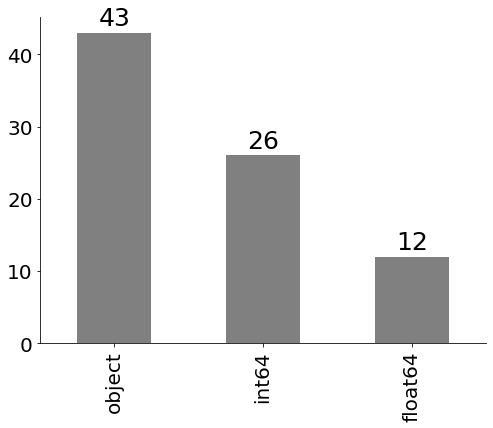

In [ ]:
plt.figure(figsize = (8,6))
ax = house_df.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20,color='grey')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 1, height, ha = 'center', size = 25)
sns.despine()

Statistical description of the numerical features

In [ ]:
house_df.describe().T.style.set_properties(**{'background-color': 'Grey',
                           'color': 'white',
                           'border-color': 'darkblack'})

,count,mean,std,min,25%,50%,75%,max
Id,2919.000000,1460.000000,842.787043,1.000000,730.500000,1460.000000,2189.500000,2919.000000
MSSubClass,2919.000000,57.137718,42.517628,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,2433.000000,69.305795,23.344905,21.000000,59.000000,68.000000,80.000000,313.000000
LotArea,2919.000000,10168.114080,7886.996359,1300.000000,7478.000000,9453.000000,11570.000000,215245.000000
OverallQual,2919.000000,6.089072,1.409947,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,2919.000000,5.564577,1.113131,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,2919.000000,1971.312778,30.291442,1872.000000,1953.500000,1973.000000,2001.000000,2010.000000
YearRemodAdd,2919.000000,1984.264474,20.894344,1950.000000,1965.000000,1993.000000,2004.000000,2010.000000
MasVnrArea,2896.000000,102.201312,179.334253,0.000000,0.000000,0.000000,164.000000,1600.000000
BsmtFinSF1,2918.000000,441.423235,455.610826,0.000000,0.000000,368.500000,733.000000,5644.000000


## 1.4 Feature Histogram

Spliting the data acording to the type from the previuse subsection and ploting hitsograme for every feature to further understanding the numerical meaning behind the features.
It can be conclude from the histogram that:

1. **float64 features:**

  Three float64 features are in fact discrete variables:
  * BsmtHalfBath - Basement half bathrooms
  * BsmtFullBath - Basement full bathrooms
  * GarageCars - Size of garage in car capacity
  
  Some features have a skewed shape to one side.


2. **int features:**

  Five int features values does not represent quantitative sizes
  * MSSubClass - Identifies the type of dwelling involved in the sale.
  * YearBuilt - Original construction date
  * YearRemodAdd - Remodel date (same as construction date if no remodeling or additions)
  * MoSold - Month Sold (MM)
  * YrSold - Year Sold (YYYY)



In [ ]:
# Select categorical columns
categorical_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if
                    house_df[cname].nunique() < 200 and 
                    house_df[cname].dtype == "object"]

print("Number of Categorical fetures:",(len(categorical_cols)))
# Select numerical columns
int_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if 
                house_df[cname].dtype in ['int64']]
    
print("Number of integer fetures:",(len(int_cols)))

float_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if 
                house_df[cname].dtype in ['float64']]
print("Number of float fetures:",(len(float_cols)))


Number of Categorical fetures: 43
Number of integer fetures: 26
Number of float fetures: 11


Number of Categorical fetures: 43
Number of integer fetures: 26
Number of float fetures: 11
int type features:


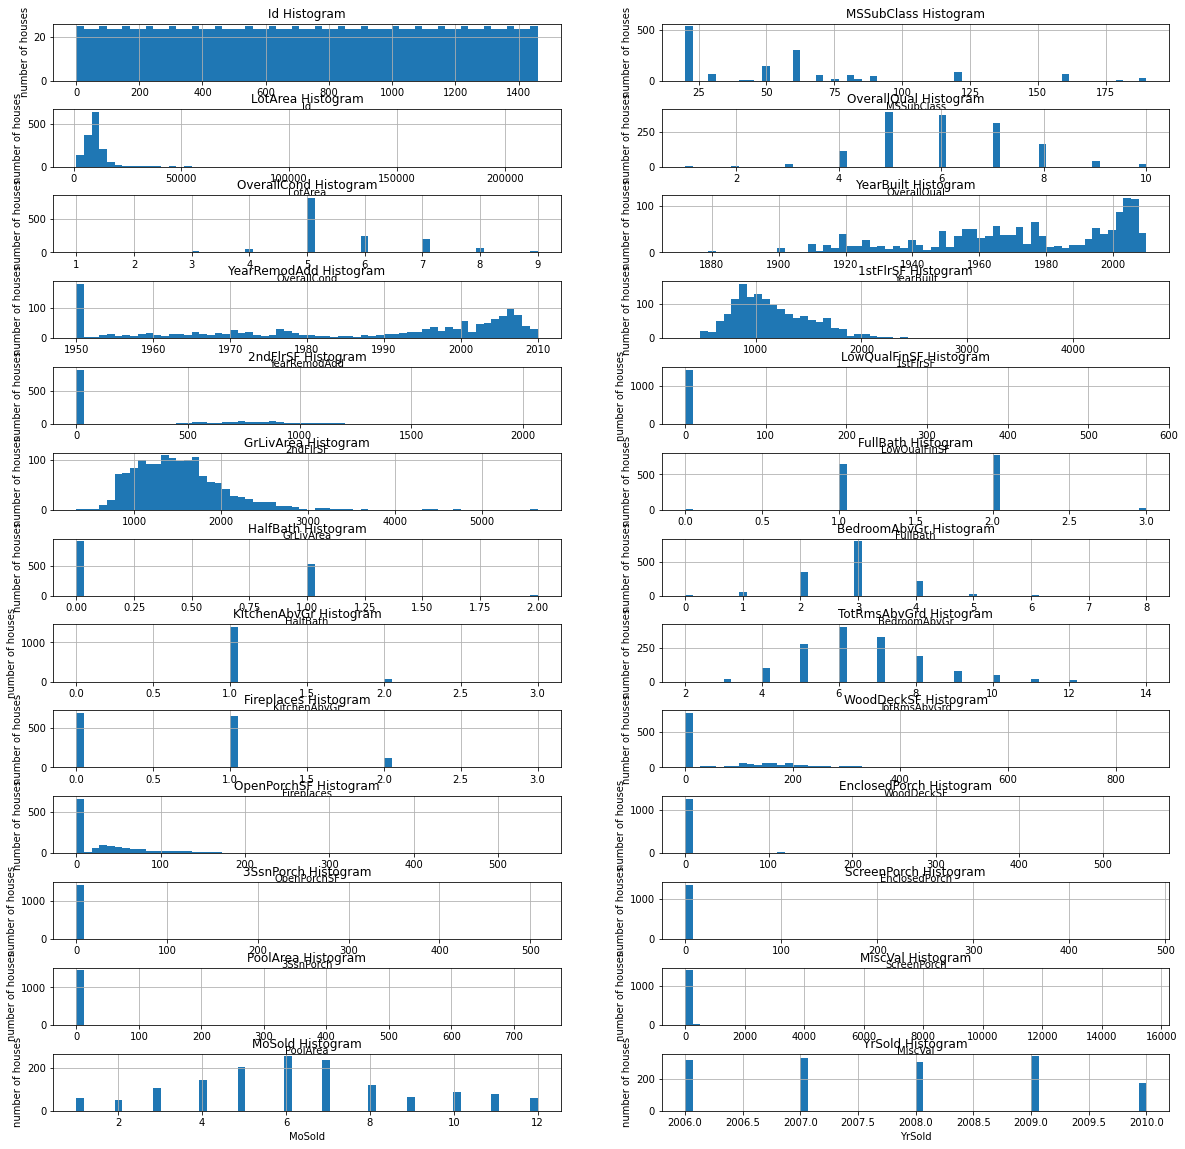

In [ ]:
print("int type features:")
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(int_cols):
    plt.subplot(13,2,i+1)
    fig = train[var].hist(bins=60)
    fig.set_ylabel('number of houses')
    fig.set_xlabel(var)
    str3= "".join([var,' Histogram'])
    fig.set_title(str3)


float type features:


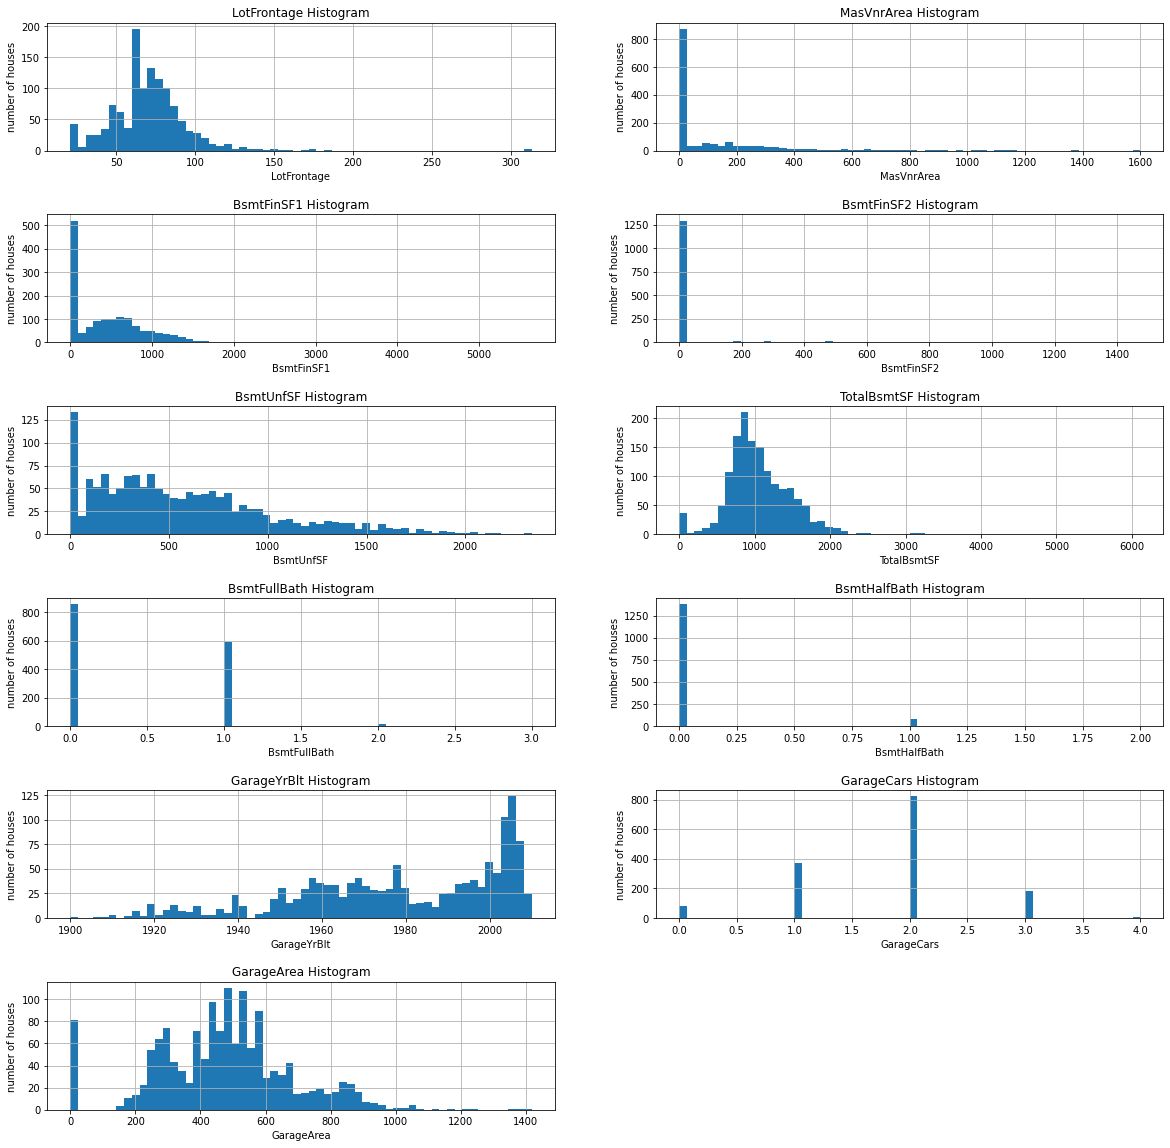

In [ ]:
print("float type features:")
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(float_cols):
    plt.subplot(6,2,i+1)
    fig = train[var].hist(bins=60)
    fig.set_ylabel('number of houses')
    fig.set_xlabel(var)
    str3= "".join([var,' Histogram'])
    fig.set_title(str3)

Categorial type features:


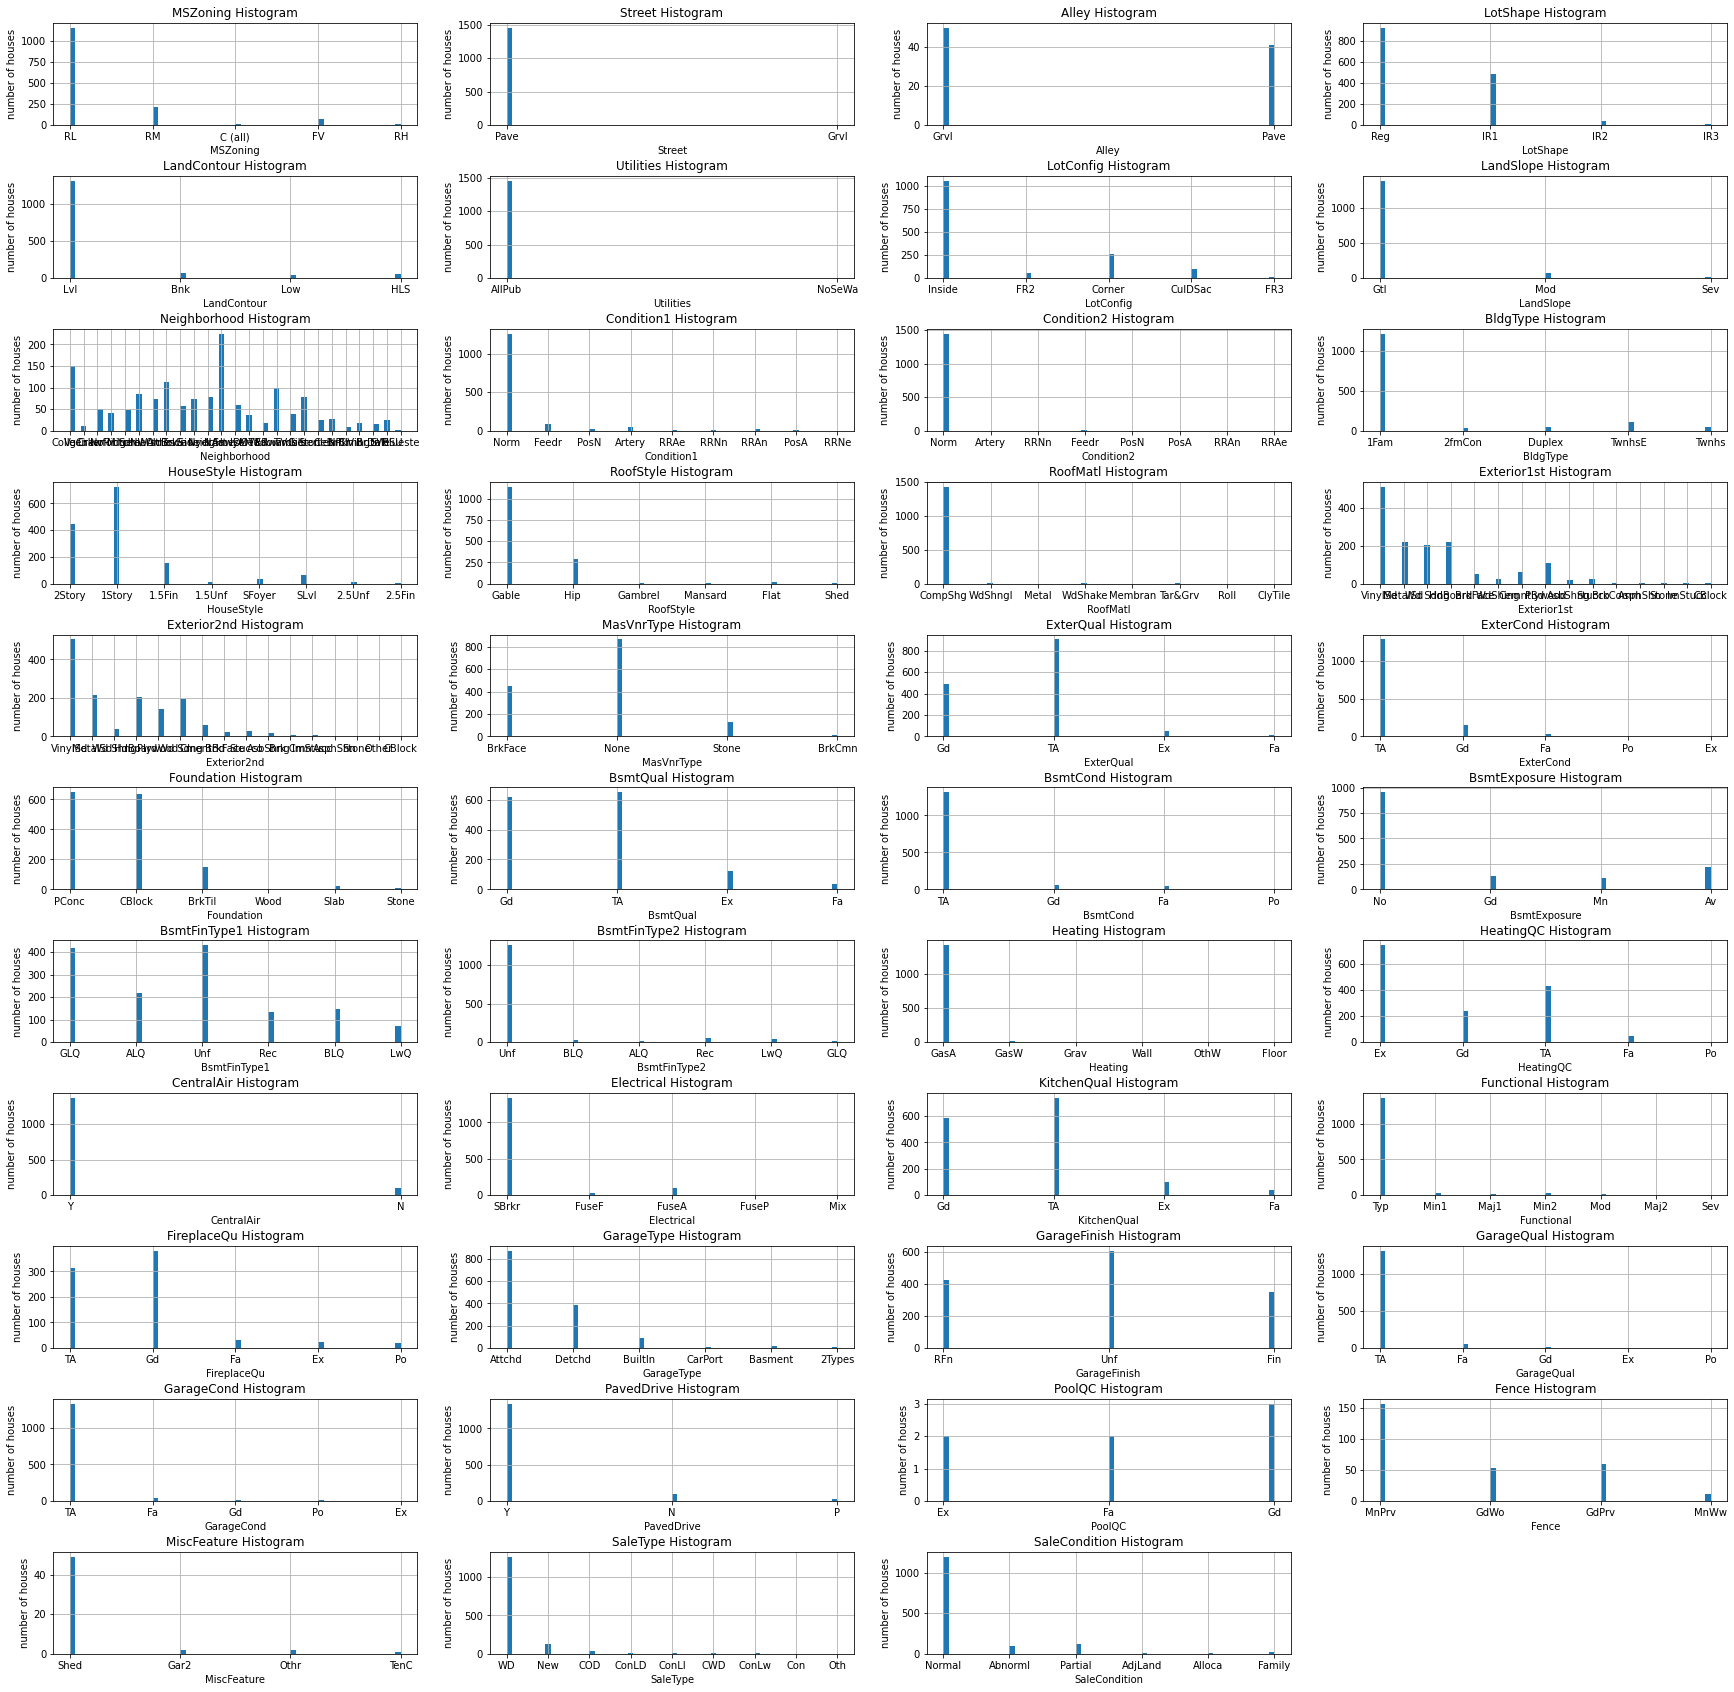

In [ ]:
print("Categorial type features:")
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(categorical_cols):
    plt.subplot(11,4,i+1)
    fig = train[var].hist(bins=60)
    fig.set_ylabel('number of houses')
    fig.set_xlabel(var)
    str3= "".join([var,' Histogram'])
    fig.set_title(str3)

factorize categorial values

# Section 2: Feature Engineering



## 2.1 Encoding categorical features

Categorial type features:


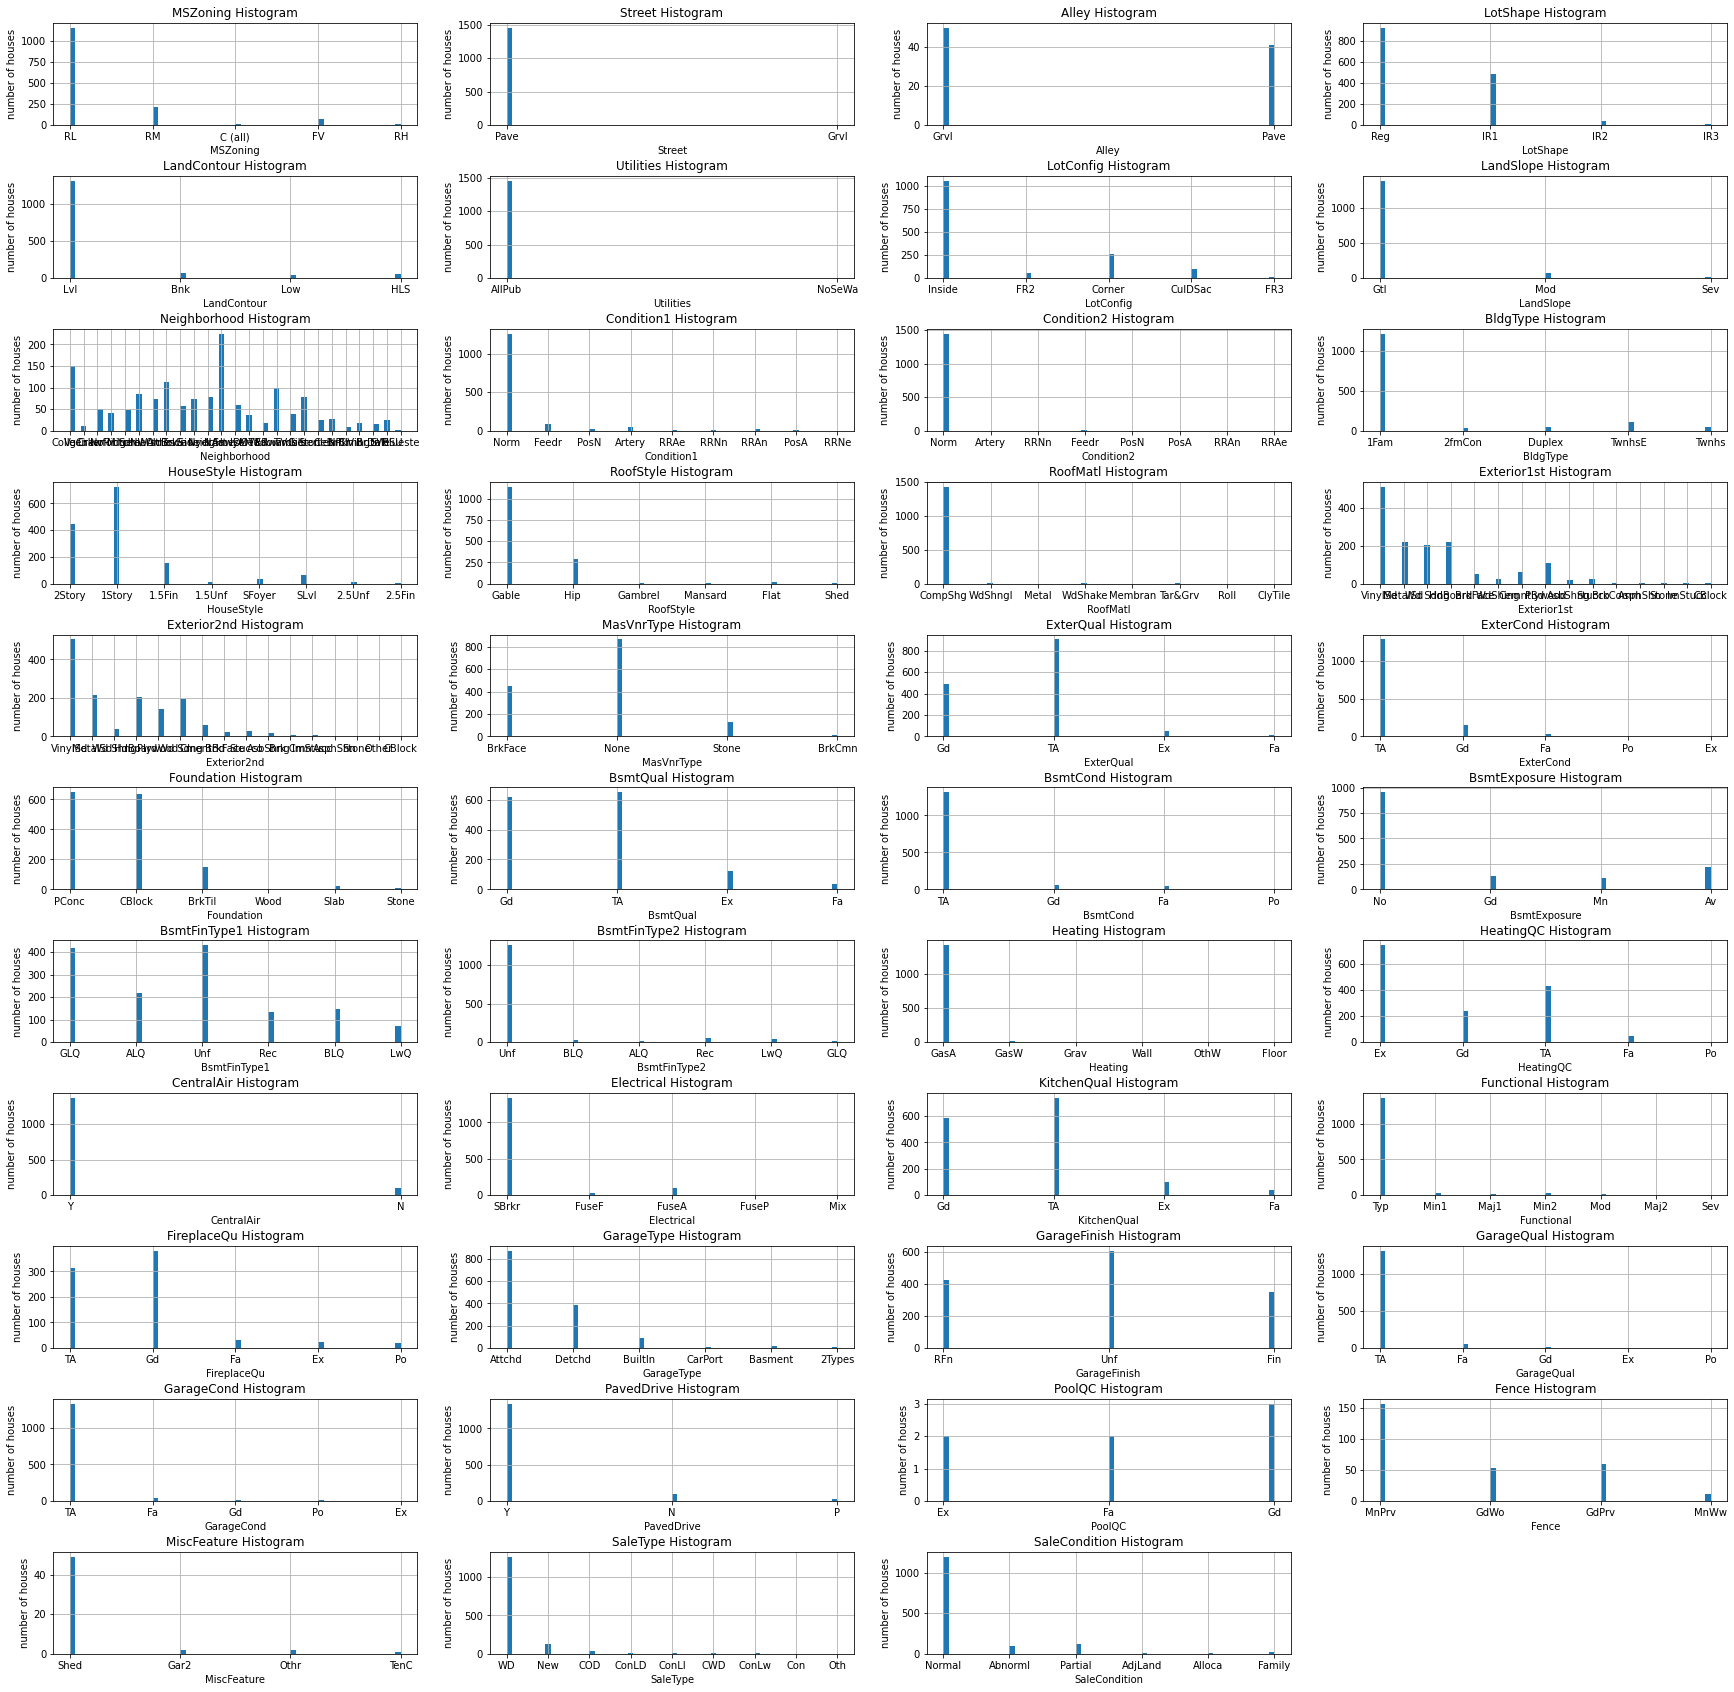

In [ ]:
print("Categorial type features:")
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(categorical_cols):
    plt.subplot(11,4,i+1)
    fig = house_df[tr_idx][var].hist(bins=60)
    fig.set_ylabel('number of houses')
    fig.set_xlabel(var)
    str3= "".join([var,' Histogram'])
    fig.set_title(str3)

### 2.1.1 Factorizing categorical features

Categorial type features:


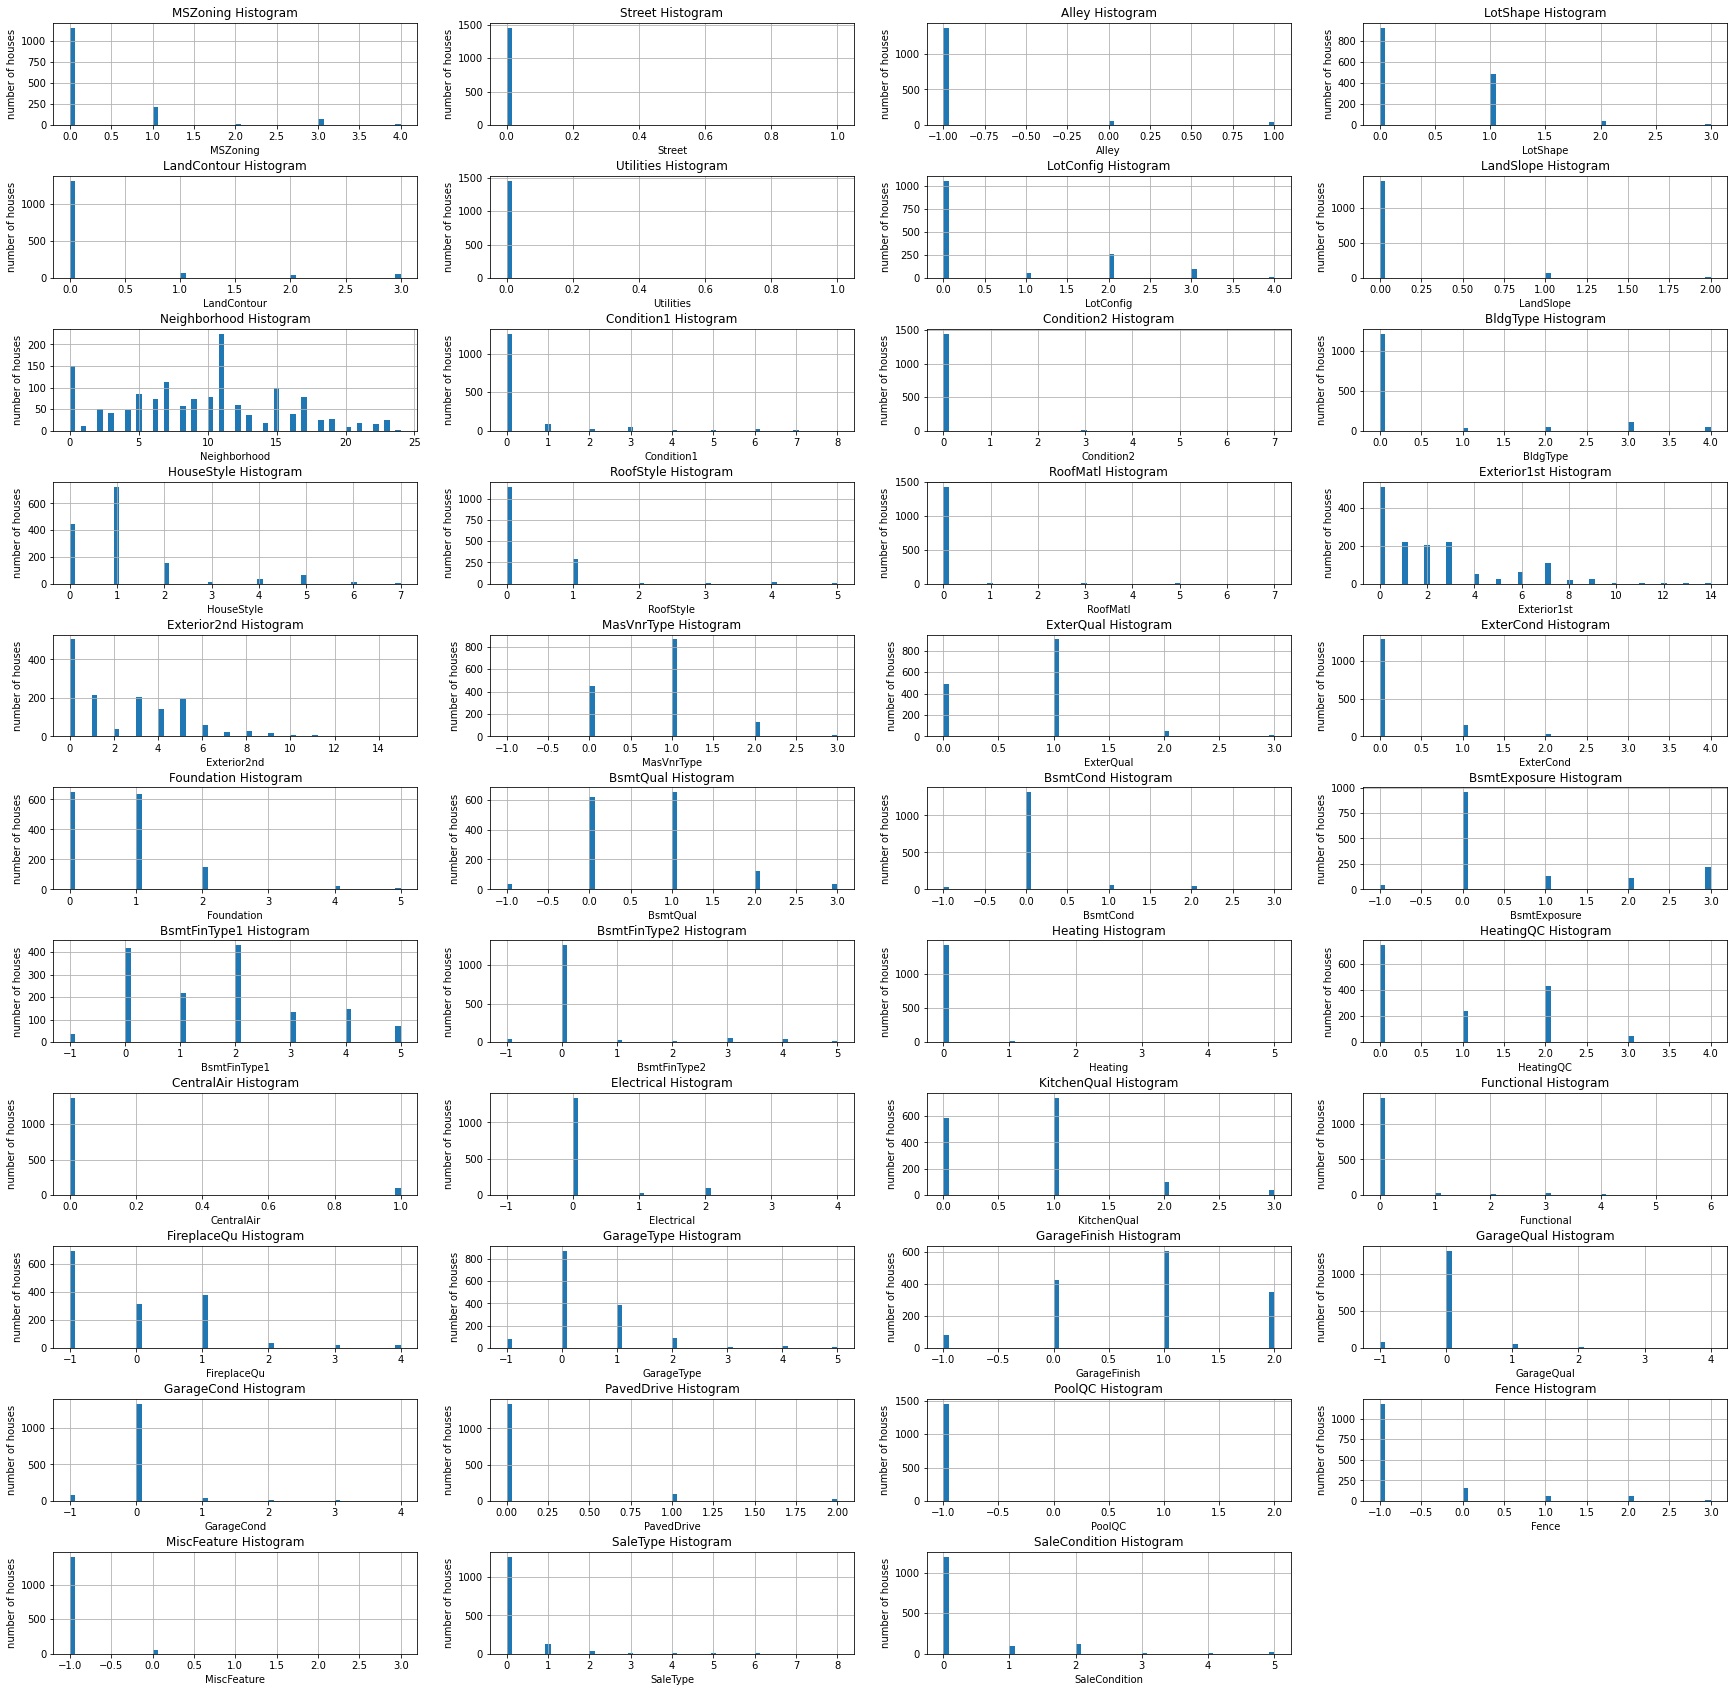

In [ ]:
def factorization(data, categorical_cols):
  for c in categorical_cols:
    data[c] = pd.factorize(data[c])[0]
  return data

house_df_fac = house_df
house_df_fac = factorization(house_df_fac, categorical_cols)

print("Categorial type features:")
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(categorical_cols):
    plt.subplot(11,4,i+1)
    fig = house_df[tr_idx][var].hist(bins=60)
    fig.set_ylabel('number of houses')
    fig.set_xlabel(var)
    str3= "".join([var,' Histogram'])
    fig.set_title(str3)

### 2.1.2 Label encoding categorical features

Another option is using Label Encoding which refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

In [ ]:
# house_df missing features
print("house_df missing features")
print("house_df shape: {}".format(train.shape))
pd.set_option('display.max_rows', None)
missing_data = pd.DataFrame(house_df[categorical_cols].isna().sum())
missing_data_prec = missing_data/house_df[categorical_cols].shape[0] * 100
missing_data = pd.concat([missing_data,missing_data_prec], axis=1)
missing_data.columns =['occurence', 'precentage']
print(missing_data)
pd.reset_option('all')

house_df missing features
house_df shape: (1460, 81)
               occurence  precentage
MSZoning               4    0.137033
Street                 0    0.000000
Alley               2721   93.216855
LotShape               0    0.000000
LandContour            0    0.000000
Utilities              2    0.068517
LotConfig              0    0.000000
LandSlope              0    0.000000
Neighborhood           0    0.000000
Condition1             0    0.000000
Condition2             0    0.000000
BldgType               0    0.000000
HouseStyle             0    0.000000
RoofStyle              0    0.000000
RoofMatl               0    0.000000
Exterior1st            1    0.034258
Exterior2nd            1    0.034258
MasVnrType            24    0.822199
ExterQual              0    0.000000
ExterCond              0    0.000000
Foundation             0    0.000000
BsmtQual              81    2.774923
BsmtCond              82    2.809181
BsmtExposure          82    2.809181
BsmtFinType1          

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Categorial type features:


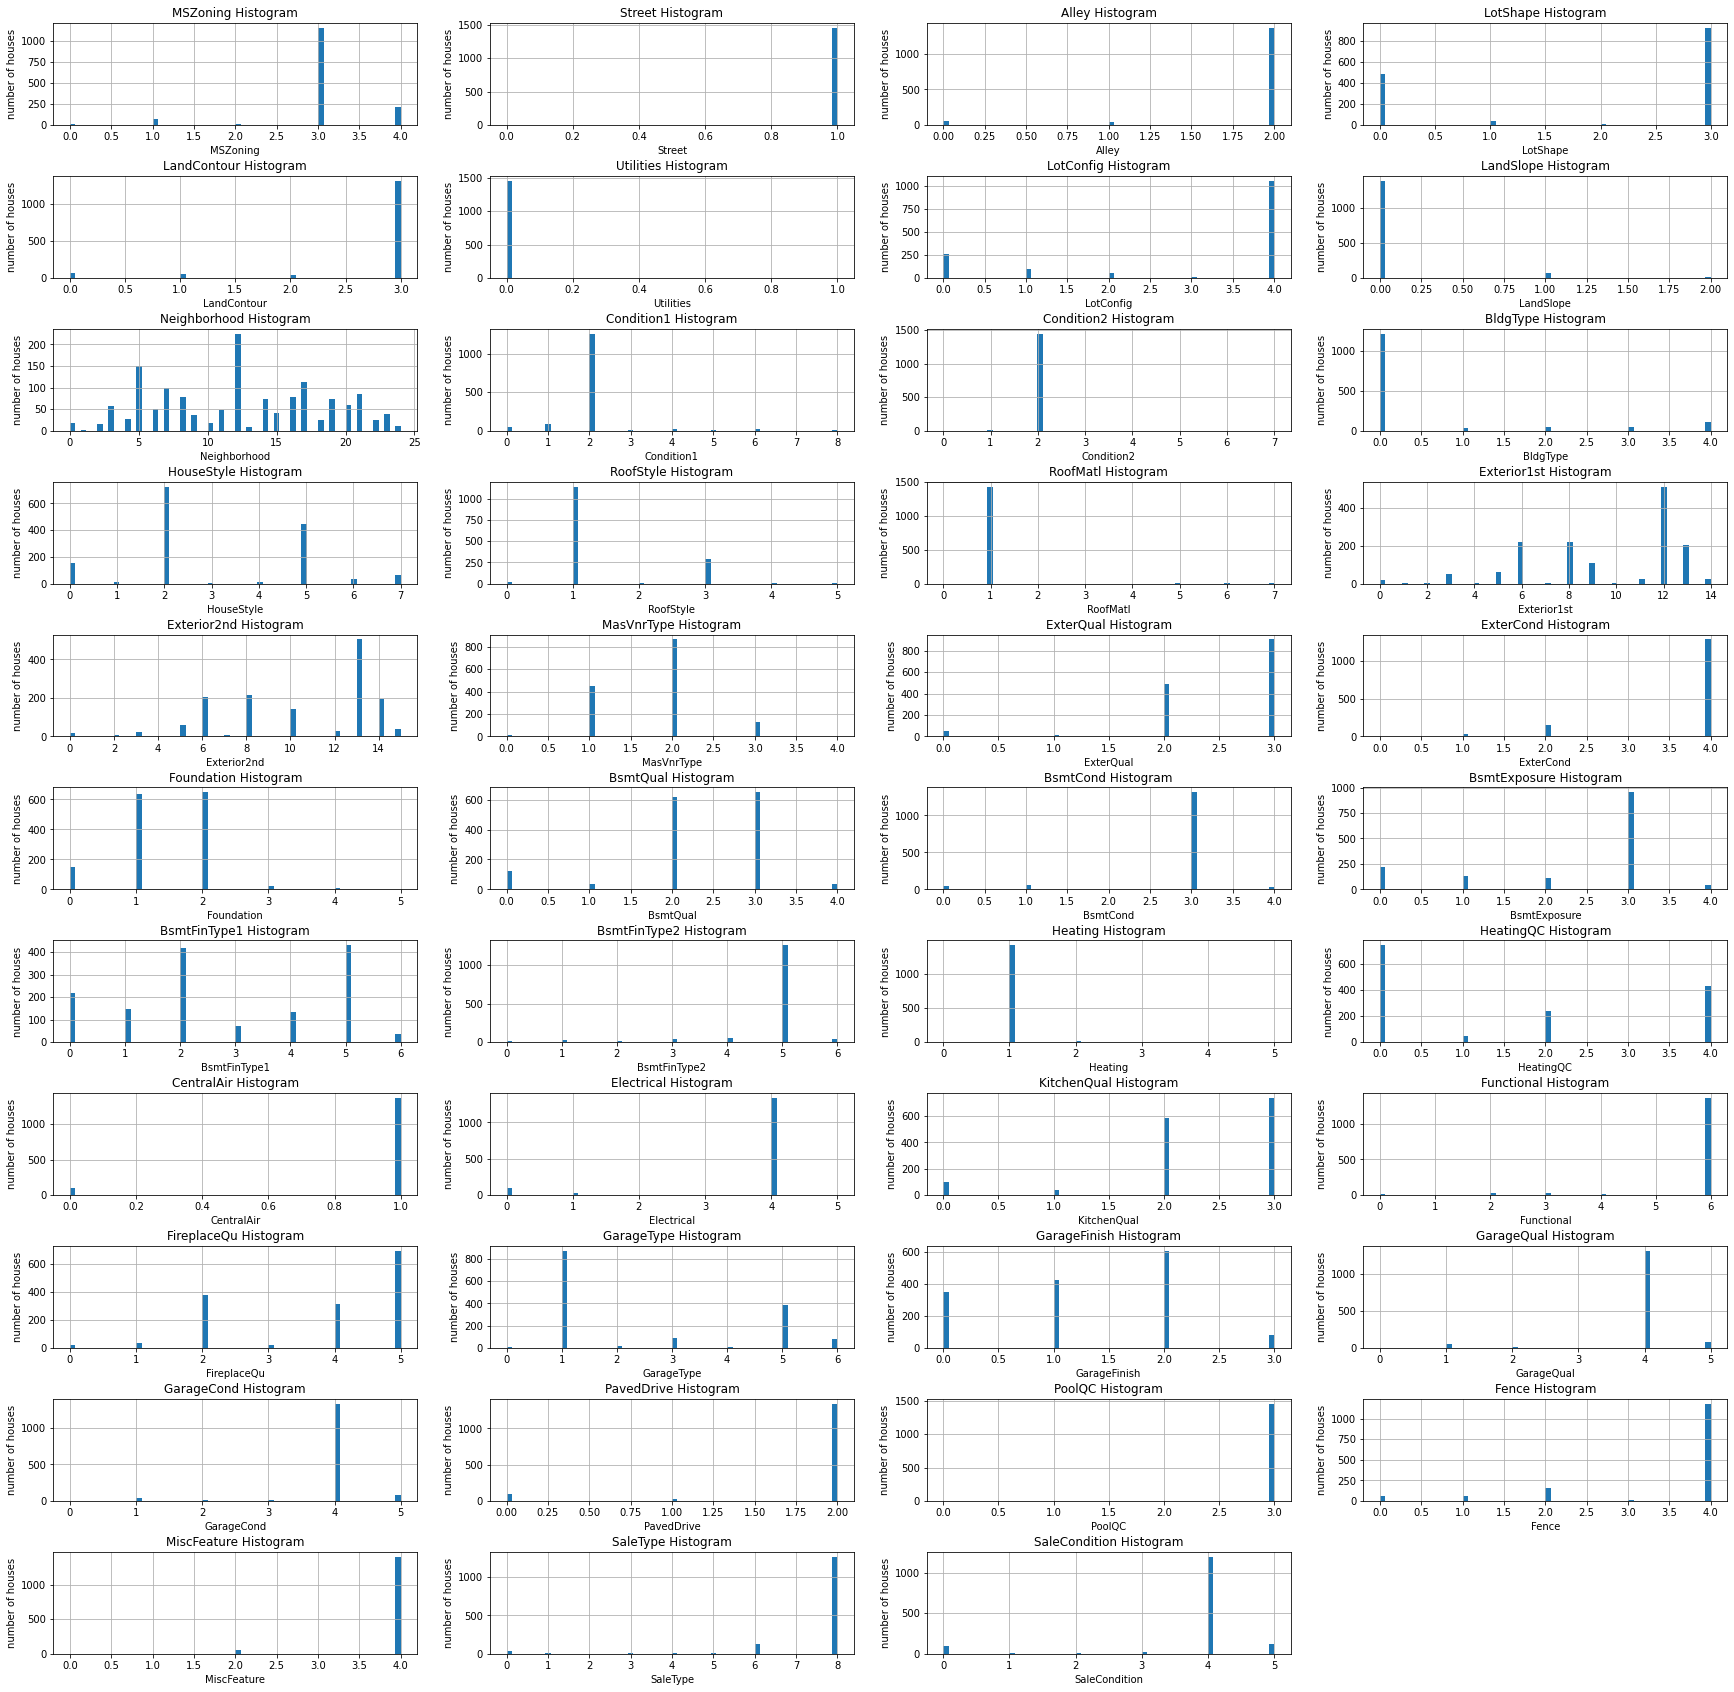

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
def Labaling(data, categorical_cols):
  for c in categorical_cols: 
    lbl = LabelEncoder()
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))
  return data

house_df = Labaling(house_df, categorical_cols)
print(categorical_cols)
print("Categorial type features:")
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(categorical_cols):
    plt.subplot(11,4,i+1)
    fig = house_df[tr_idx][var].hist(bins=60)
    fig.set_ylabel('number of houses')
    fig.set_xlabel(var)
    str3= "".join([var,' Histogram'])
    fig.set_title(str3)

In [ ]:
# house_df missing features
print("house_df missing features")
print("house_df shape: {}".format(train.shape))
pd.set_option('display.max_rows', None)
missing_data = pd.DataFrame(house_df[categorical_cols].isna().sum())
missing_data_prec = missing_data/house_df[categorical_cols].shape[0] * 100
missing_data = pd.concat([missing_data,missing_data_prec], axis=1)
missing_data.columns =['occurence', 'precentage']
print(missing_data)
pd.reset_option('all')

house_df missing features
house_df shape: (1460, 81)
               occurence  precentage
MSZoning               0         0.0
Street                 0         0.0
Alley                  0         0.0
LotShape               0         0.0
LandContour            0         0.0
Utilities              0         0.0
LotConfig              0         0.0
LandSlope              0         0.0
Neighborhood           0         0.0
Condition1             0         0.0
Condition2             0         0.0
BldgType               0         0.0
HouseStyle             0         0.0
RoofStyle              0         0.0
RoofMatl               0         0.0
Exterior1st            0         0.0
Exterior2nd            0         0.0
MasVnrType             0         0.0
ExterQual              0         0.0
ExterCond              0         0.0
Foundation             0         0.0
BsmtQual               0         0.0
BsmtCond               0         0.0
BsmtExposure           0         0.0
BsmtFinType1          

### 2.1.3 One-hot encoding categorical features
We apply One-Hot Encoding when:

The categorical feature is not ordinal (like the countries above)
The number of categorical features is less so one-hot encoding can be effectively applied
We apply Label Encoding when:

The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
 The number of categories is quite large as one-hot encoding can lead to high memory consumption

## 2.2 Dealing with Outliers

***outlier:***  a data point that is distant from other similar points.should be excluded from the data set. We'll do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

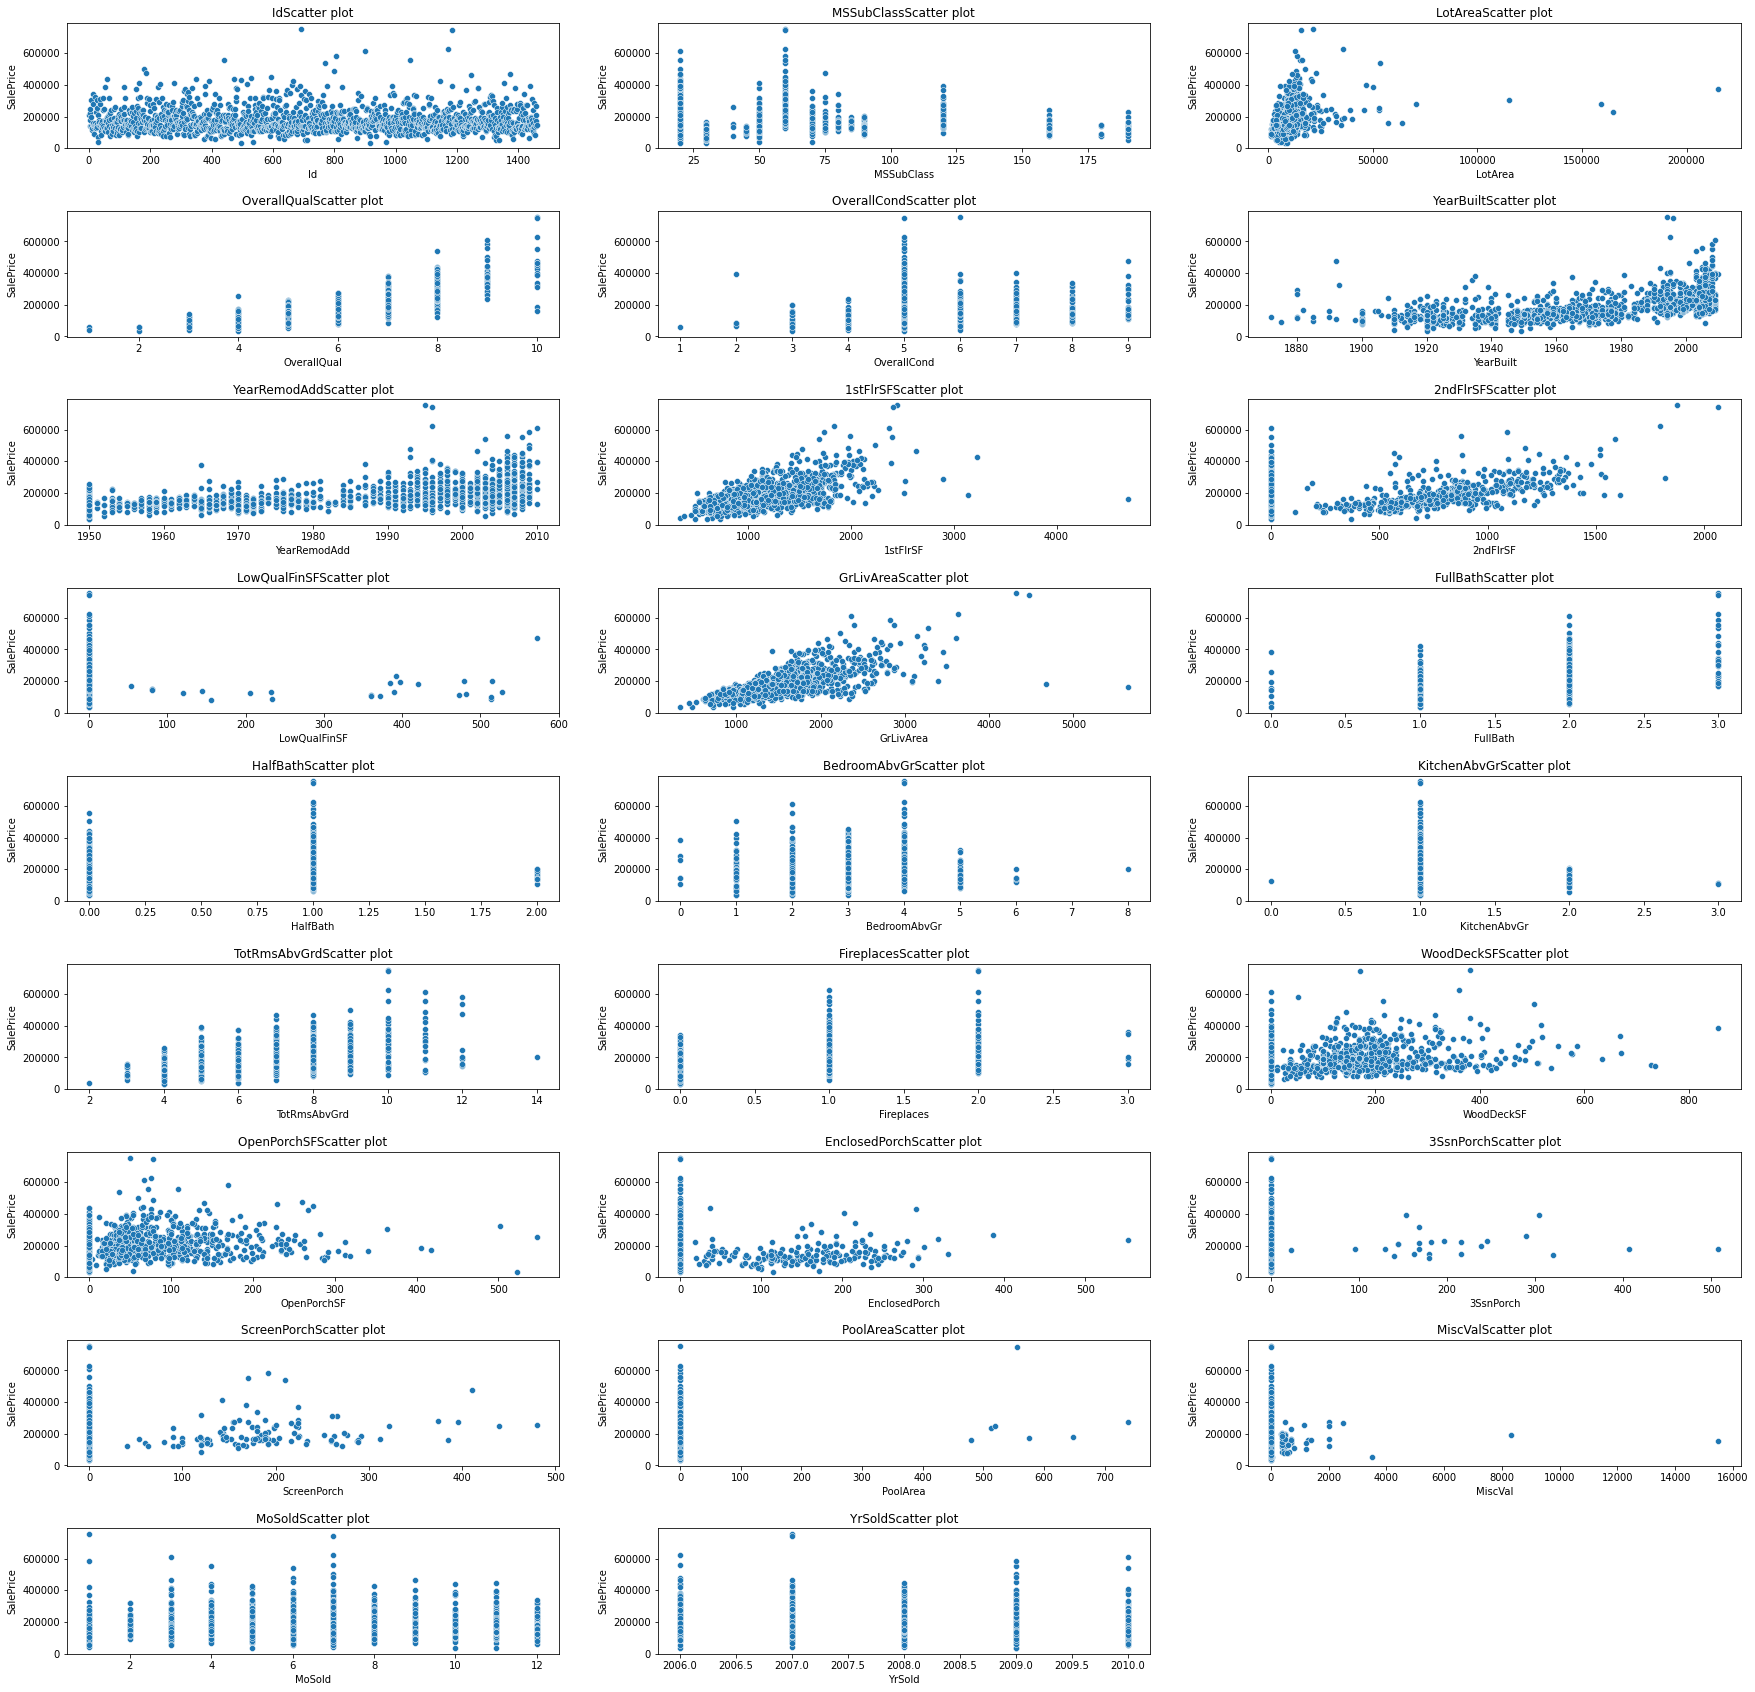

In [ ]:
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(int_cols):
  plt.subplot(9,3,i+1)
  fig = sns.scatterplot(data=train, x=var, y='SalePrice')
  fig.set_ylabel("SalePrice", labelpad = 5)
  fig.set_xlabel(var)
  str3= "".join([var,'Scatter plot'])
  fig.set_title(str3)
plt.show()


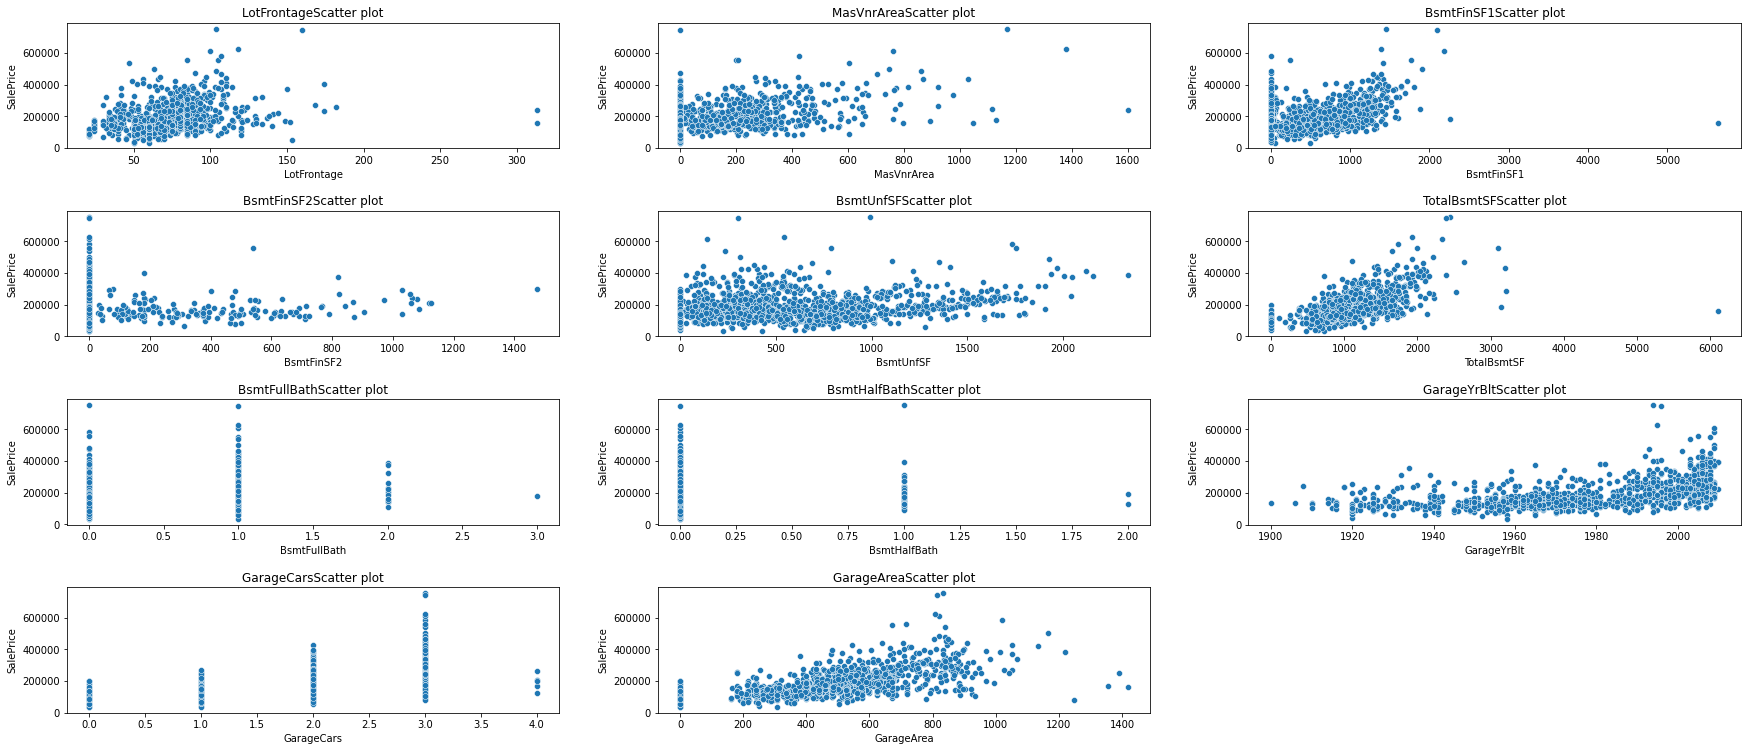

In [ ]:
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(float_cols):
  plt.subplot(9,3,i+1)
  fig = sns.scatterplot(data=house_df[tr_idx],x=var,y='SalePrice')
  fig.set_ylabel("SalePrice", labelpad = 5)
  fig.set_xlabel(var)
  str3= "".join([var,'Scatter plot'])
  fig.set_title(str3)
plt.show()


In [ ]:
index = (house_df[tr_idx]['LotArea'] > 100000)
index_list = list(house_df[tr_idx][index].index)
print(index_list)
house_df = house_df.drop(index_list)
house_df

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def remove_Outlier(data,tr_idx ,feature_name, value):
  index = (data[tr_idx][feature_name] > value)
  index_list = list(data[tr_idx][index].index)
  data = data.drop(index_list)
  return data

### lets Analyze where the outliers are hidding:
by observing the scatter praphs above we can notice the following ouliers data points:

**For integer represented features**:

1. LotArea feature - over 100000
2. 1stFlrSF feature - over 2500
3. 2ndFlrSF feature - over 1750
4. GrLiveArea feature - over 4000
5. WoodDeckSF feature - over 700
6. PoolArea feature - over 400
7. MiscVal feature - over 8000
8. EnclosedPorch feature - over 350




In [ ]:
# int cols
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "LotArea", 100000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "1stFlrSF", 2500)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "2ndFlrSF", 1750)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "GrLivArea", 4000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "WoodDeckSF", 700)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "PoolArea", 400)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "MiscVal", 8000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "EnclosedPorch", 350)
# float cols
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "MasVnrArea", 1200)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "BsmtFinSF1", 2000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "BsmtFinSF2", 1200)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "TotalBsmtSF", 3000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "GarageArea", 1100)

In [ ]:
# int cols
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "LotArea", 100000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "1stFlrSF", 2500)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "2ndFlrSF", 1750)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "GrLivArea", 4000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "WoodDeckSF", 700)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "PoolArea", 400)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "MiscVal", 8000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "EnclosedPorch", 350)
# float cols
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "MasVnrArea", 1200)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "BsmtFinSF1", 2000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "BsmtFinSF2", 1200)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "TotalBsmtSF", 3000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "GarageArea", 1100)

               occurence  precentage
Id                     4    0.137033
MSSubClass             4    0.137033
MSZoning               8    0.274066
LotFrontage          487   16.683796
LotArea                4    0.137033
Street                 4    0.137033
Alley               2721   93.216855
LotShape               4    0.137033
LandContour            4    0.137033
Utilities              6    0.205550
LotConfig              4    0.137033
LandSlope              4    0.137033
Neighborhood           4    0.137033
Condition1             4    0.137033
Condition2             4    0.137033
BldgType               4    0.137033
HouseStyle             4    0.137033
OverallQual            4    0.137033
OverallCond            4    0.137033
YearBuilt              4    0.137033
YearRemodAdd           4    0.137033
RoofStyle              4    0.137033
RoofMatl               4    0.137033
Exterior1st            5    0.171292
Exterior2nd            5    0.171292
MasVnrType            28    0.959233
M

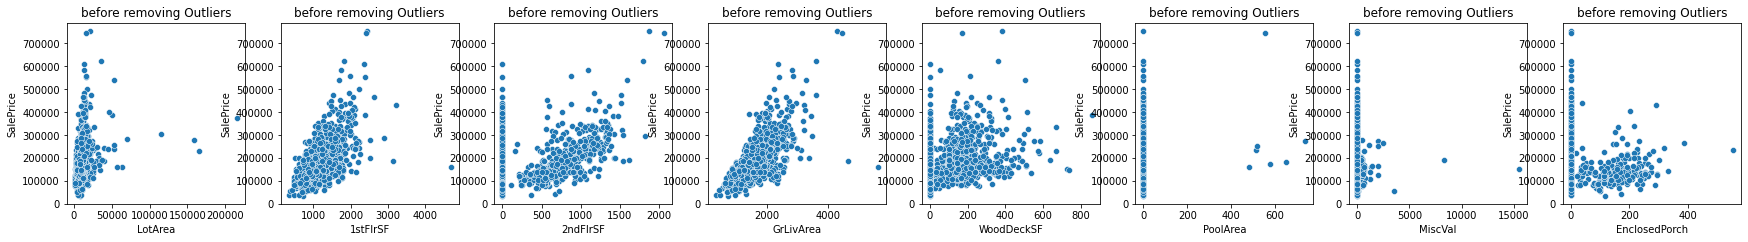

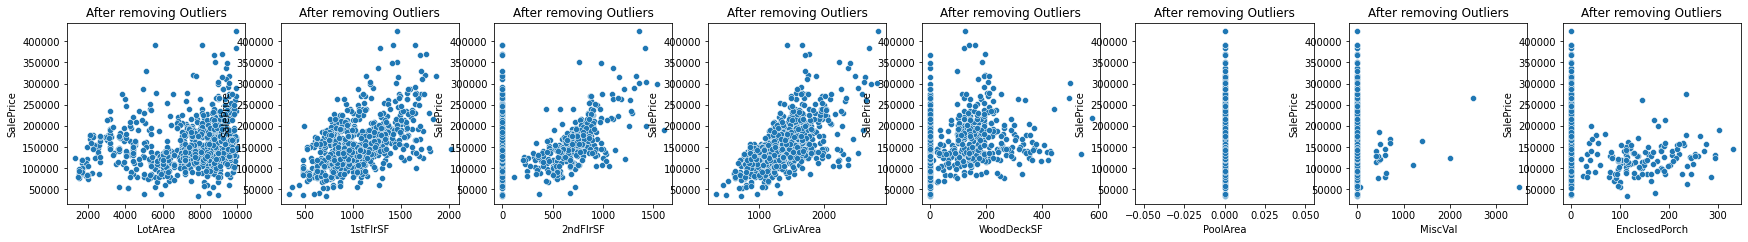

In [ ]:
plt.figure(figsize=(30, 10))
plt.subplots_adjust(hspace=1)
for i, var in enumerate(["LotArea", "1stFlrSF", "2ndFlrSF", "GrLivArea", "WoodDeckSF", "PoolArea", "MiscVal", "EnclosedPorch"]):
  plt.subplot(2,8,i+1)
  fig = sns.scatterplot(data=house_df[tr_idx],x=var,y='SalePrice')
  fig.set_ylabel("SalePrice", labelpad = 5)
  fig.set_xlabel(var)
  fig.set_title("before removing Outliers")
plt.show()
# int cols
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "LotArea", 10000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "1stFlrSF", 2500)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "2ndFlrSF", 1750)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "GrLivArea", 4000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "WoodDeckSF", 700)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "PoolArea", 400)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "MiscVal", 8000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "EnclosedPorch", 350)

plt.figure(figsize=(30, 10))
plt.subplots_adjust(hspace=1)
for i, var in enumerate(["LotArea", "1stFlrSF", "2ndFlrSF", "GrLivArea", "WoodDeckSF", "PoolArea", "MiscVal", "EnclosedPorch"]):
  plt.subplot(2,8,i+9)
  fig = sns.scatterplot(data=house_df[tr_idx],x=var,y='SalePrice')
  fig.set_ylabel("SalePrice", labelpad = 5)
  fig.set_xlabel(var)
  fig.set_title("After removing Outliers")
plt.show()

In [ ]:
float_cols

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

**For float represented features**:

1. MasVnrArea feature - over 1200
2. BsmtFinSF1 feature - over 2000
3. BsmtFinSF2 feature - over 1200
4. TotalBsmtSF feature - over 3000
5. GarageArea feature - over 1100

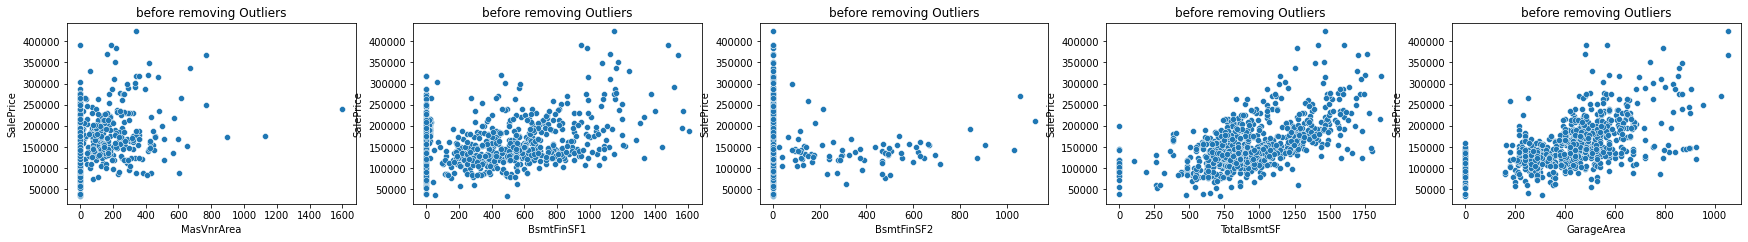

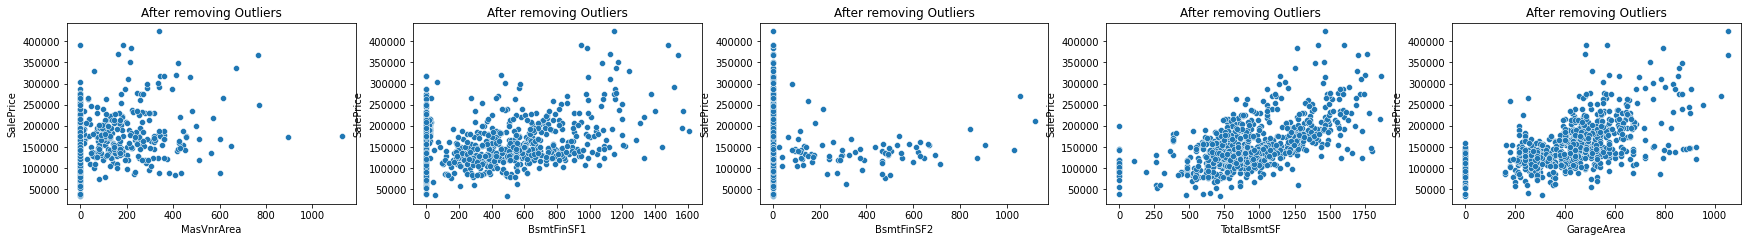

In [ ]:
plt.figure(figsize=(30, 10))
plt.subplots_adjust(hspace=1)
float_Outliers = ["MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "TotalBsmtSF", "GarageArea"]
for i, var in enumerate(float_Outliers):
  plt.subplot(2,len(float_Outliers),i+1)
  fig = sns.scatterplot(data=house_df[tr_idx],x=var,y='SalePrice')
  fig.set_ylabel("SalePrice", labelpad = 5)
  fig.set_xlabel(var)
  fig.set_title("before removing Outliers")
plt.show()

# float cols
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "MasVnrArea", 1200)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "BsmtFinSF1", 2000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "BsmtFinSF2", 1200)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "TotalBsmtSF", 3000)
house_df[tr_idx] = remove_Outlier(house_df[tr_idx], "GarageArea", 1100)

plt.figure(figsize=(30, 10))
plt.subplots_adjust(hspace=1)
for i, var in enumerate(float_Outliers):
  plt.subplot(2, len(float_Outliers),i + len(float_Outliers) + 1)
  fig = sns.scatterplot(data=house_df[tr_idx],x=var,y='SalePrice')
  fig.set_ylabel("SalePrice", labelpad = 5)
  fig.set_xlabel(var)
  fig.set_title("After removing Outliers")
plt.show()

After applying the outliers removal severl times for different features, we notice that the most beneficial removal of outliers contain the following features as described in function: 

In [ ]:
def remove_Outlier(data, feature_name, value):
  idx = (data[feature_name] > value)
  index_list = list(data[idx].index)
  data = data.drop(index_list)
  return data

def Remove_all_ourliers(data):
  ## int cols
  data = remove_Outlier(data, "LotFrontage", 200)
  data = remove_Outlier(data, "BsmtFinSF1", 2000)
  data = remove_Outlier(data, "1stFlrSF", 2500)
  data = remove_Outlier(data, "TotalBsmtSF", 3000)
  data = remove_Outlier(data, "GrLivArea", 4000)
  data = remove_Outlier(data, "LotArea", 100000)
  return data

## 2.3 Taking care of skewed target

The Sale price is a bit skewed, and for linear models its important that you normalize your data, so im going to log transform it

Text(0.5, 1.0, 'Log Transform Target SalePrice - unskewed')

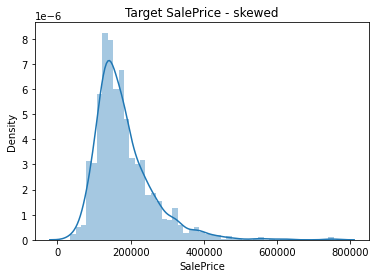

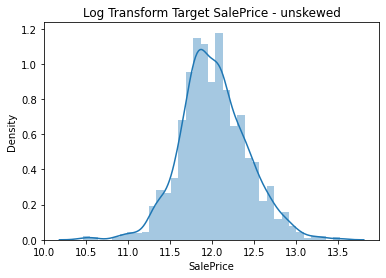

In [ ]:
plt.figure()
sns.distplot(house_df['SalePrice']);
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])
plt.title('Target SalePrice - skewed')
plt.figure()
sns.distplot(house_df['SalePrice'])
plt.title('Log Transform Target SalePrice - unskewed')

## 2.4 Missing Values

https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py

In [ ]:
X_train = house_df[tr_idx].drop(['SalePrice'], axis=1)
X_test = house_df[te_idx]
Y_train = house_df[tr_idx].SalePrice
Y_test = house_df[te_idx].SalePrice
overall_X = house_df.drop(['SalePrice'], axis=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(overall_X.shape)

(1460, 80)
(1460,)
(1459, 81)
(1459,)
(2919, 80)


### option 1 - get rid of the columns with the missing values

usually not the best solution. However, it can be useful when most values in a column are missing

In [ ]:
missing_data = [col for col in X_train.columns if (X_train[col].isnull().sum() / X_train.shape[0]) * 100 > 50]
missing_data
print('missing_data: {}'.format(missing_data))
X_df_drop = overall_X.drop(missing_data, axis=1)
X_train_drop = X_df_drop[tr_idx]
X_test_drop = X_df_drop[te_idx]

print('X_df_drop shape:     {}'.format(X_df_drop.shape))
print('X_train_drop shape:  {}'.format(X_train_drop.shape))
print('X_test_drop shape:   {}'.format(X_test_drop.shape))
print(type(tr_idx))

missing_data: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
X_df_drop shape:     (2919, 76)
X_train_drop shape:  (1460, 76)
X_test_drop shape:   (1459, 76)
<class 'pandas.core.series.Series'>


### option 2 - replacing with statistical value

In [ ]:
X = X_df_drop
pd.set_option('display.max_rows', None)
missing_data = pd.DataFrame(X.isna().sum())
missing_data_prec = missing_data/X.shape[0] * 100
missing_data = pd.concat([missing_data,missing_data_prec], axis=1)
missing_data.columns =['occurence', 'precentage']
print(missing_data)
pd.reset_option('all')

               occurence  precentage
Id                     0    0.000000
MSSubClass             0    0.000000
MSZoning               4    0.137033
LotFrontage          486   16.649538
LotArea                0    0.000000
Street                 0    0.000000
LotShape               0    0.000000
LandContour            0    0.000000
Utilities              2    0.068517
LotConfig              0    0.000000
LandSlope              0    0.000000
Neighborhood           0    0.000000
Condition1             0    0.000000
Condition2             0    0.000000
BldgType               0    0.000000
HouseStyle             0    0.000000
OverallQual            0    0.000000
OverallCond            0    0.000000
YearBuilt              0    0.000000
YearRemodAdd           0    0.000000
RoofStyle              0    0.000000
RoofMatl               0    0.000000
Exterior1st            1    0.034258
Exterior2nd            1    0.034258
MasVnrType            24    0.822199
MasVnrArea            23    0.787941
E

we should try to apply the missing values algorithms for the concatanate data, and on the train data by itself.

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
class Impute_class(object):
  def __init__(self, X):
    self.X = X

  def impute_values(self, cols, method, K = 2):
    data = self.X
    self.method = method
    self.K = K
    imputer = self.impute_method()
    imputer.fit(self.X)
    new_X = pd.DataFrame(imputer.fit_transform(self.X[cols]))
    new_X.cols = self.X[cols].columns
    data[cols] = new_X
    return data

  def impute_method(self):
    if self.method == "zero":
      imputer = SimpleImputer(add_indicator=False, strategy="constant", fill_value=0)

    elif self.method == "mean":
      imputer = SimpleImputer(add_indicator=False, strategy="mean")

    elif self.method == "median":
      imputer = SimpleImputer(add_indicator=False, strategy="median")
      
    elif self.method == "most_frequent":
      imputer = SimpleImputer(add_indicator=False, strategy="most_frequent")

    elif self.method == "KNN":
      imputer = KNNImputer(n_neighbors=self.K, weights="uniform")
      
    return imputer

In [ ]:
X = X_df_drop
pd.set_option('display.max_rows', None)
missing_data = pd.DataFrame(X.isna().sum())
missing_data_prec = missing_data/X.shape[0] * 100
missing_data = pd.concat([missing_data,missing_data_prec], axis=1)
missing_data.columns =['occurence', 'precentage']
print(missing_data)
pd.reset_option('all')

               occurence  precentage
Id                     0    0.000000
MSSubClass             0    0.000000
MSZoning               4    0.137033
LotFrontage          486   16.649538
LotArea                0    0.000000
Street                 0    0.000000
LotShape               0    0.000000
LandContour            0    0.000000
Utilities              2    0.068517
LotConfig              0    0.000000
LandSlope              0    0.000000
Neighborhood           0    0.000000
Condition1             0    0.000000
Condition2             0    0.000000
BldgType               0    0.000000
HouseStyle             0    0.000000
OverallQual            0    0.000000
OverallCond            0    0.000000
YearBuilt              0    0.000000
YearRemodAdd           0    0.000000
RoofStyle              0    0.000000
RoofMatl               0    0.000000
Exterior1st            1    0.034258
Exterior2nd            1    0.034258
MasVnrType            24    0.822199
MasVnrArea            23    0.787941
E

In [ ]:
I = Impute_class(X=X)
I.impute_values(cols=categorical_cols, method= "most_frequent")
I.impute_values(cols= int_cols, method= "median")
I.impute_values(cols= float_cols, method= "KNN", K=10)
X = I.X

pd.set_option('display.max_rows', None)
missing_data = pd.DataFrame(X.isna().sum())
missing_data_prec = missing_data/X.shape[0] * 100
missing_data = pd.concat([missing_data,missing_data_prec], axis=1)
missing_data.columns =['occurence', 'precentage']
print(missing_data)
pd.reset_option('all')

               occurence  precentage
Id                     0         0.0
MSSubClass             0         0.0
MSZoning               0         0.0
LotFrontage            0         0.0
LotArea                0         0.0
Street                 0         0.0
Alley                  0         0.0
LotShape               0         0.0
LandContour            0         0.0
Utilities              0         0.0
LotConfig              0         0.0
LandSlope              0         0.0
Neighborhood           0         0.0
Condition1             0         0.0
Condition2             0         0.0
BldgType               0         0.0
HouseStyle             0         0.0
OverallQual            0         0.0
OverallCond            0         0.0
YearBuilt              0         0.0
YearRemodAdd           0         0.0
RoofStyle              0         0.0
RoofMatl               0         0.0
Exterior1st            0         0.0
Exterior2nd            0         0.0
MasVnrType             0         0.0
M

##2.5 Normalize features

https://www.width.ai/pandas/normalize-column-pandas-dataframe

There is a problem here since all elements became float type - its sh

In [ ]:
from scipy import stats
X_train_imp_norm =  pd.DataFrame(stats.zscore(X))
X_train_imp_norm.columns = X.columns
X_train_imp_norm

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
"""
from sklearn.cluster import KMeans
kmeans = KMeans(3,init='k-means++')
kmeans.fit(df_preprocessed.drop('species',axis=1))
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(df_preprocessed.drop('species',axis=1))
    pred_i = kmeans.labels_
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,10),wcss)
plt.ylim([0,1800])
plt.title('The Elbow Method',{'fontsize':20})
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares');

new_X_train
"""

"\nfrom sklearn.cluster import KMeans\nkmeans = KMeans(3,init='k-means++')\nkmeans.fit(df_preprocessed.drop('species',axis=1))\nwcss=[]\nfor i in range(1,10):\n    kmeans = KMeans(i)\n    kmeans.fit(df_preprocessed.drop('species',axis=1))\n    pred_i = kmeans.labels_\n    wcss.append(kmeans.inertia_)\n\nplt.figure(figsize=(10,6))\nplt.plot(range(1,10),wcss)\nplt.ylim([0,1800])\nplt.title('The Elbow Method',{'fontsize':20})\nplt.xlabel('Number of clusters')\nplt.ylabel('Within-cluster Sum of Squares');\n\nnew_X_train\n"

In [ ]:
"""
def optimize_k(data, target):
    errors = []
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=df.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors
k_errors = optimize_k(data=df, target='MEDV')
"""

"\ndef optimize_k(data, target):\n    errors = []\n    for k in range(1, 20, 2):\n        imputer = KNNImputer(n_neighbors=k)\n        imputed = imputer.fit_transform(data)\n        df_imputed = pd.DataFrame(imputed, columns=df.columns)\n        \n        X = df_imputed.drop(target, axis=1)\n        y = df_imputed[target]\n        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n        model = RandomForestRegressor()\n        model.fit(X_train, y_train)\n        preds = model.predict(X_test)\n        error = rmse(y_test, preds)\n        errors.append({'K': k, 'RMSE': error})\n        \n    return errors\nk_errors = optimize_k(data=df, target='MEDV')\n"

## 2.6 Corrulations

Relationship between SalePrice and other numerical columns

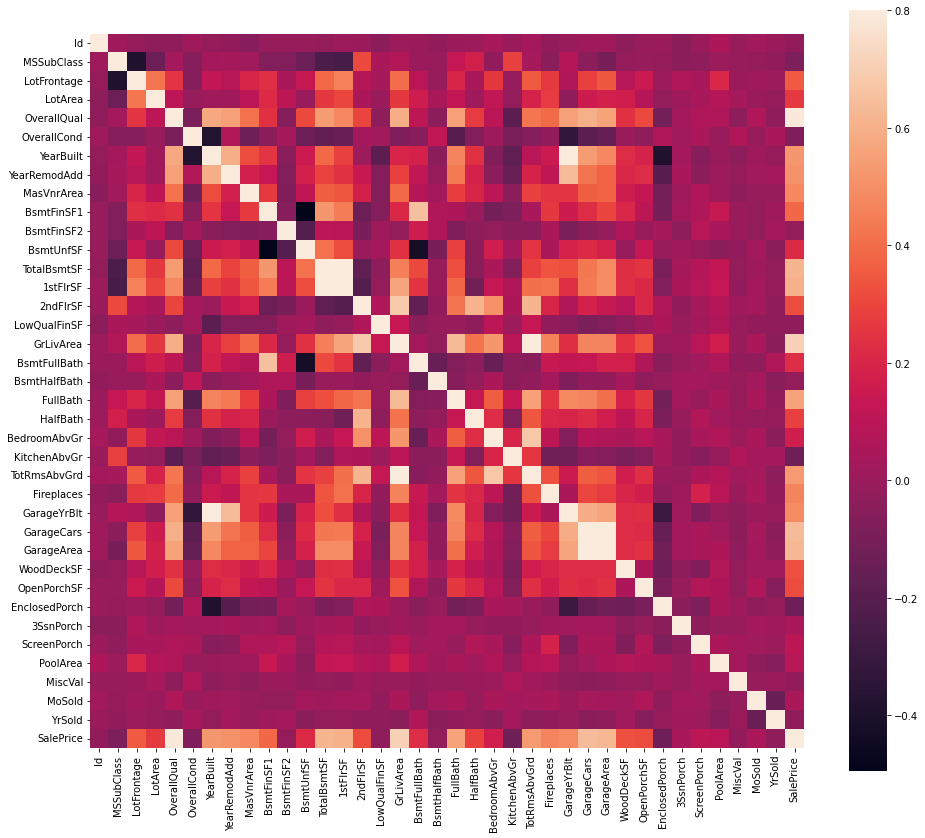

In [ ]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corrmat, vmax=.8, square=True);

# Section 3: Implement prediction models

## 3.1 Model implemention

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

class Regression_model(object):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def Linear_reg(self):
        self.model = LinearRegression(normalize=True)
        self.model.fit(self.X, self.Y)

    def Lasso_reg(self, alphas):
        self.model = LassoCV(alphas=alphas)
        self.model.fit(self.X, self.Y)
        
    def Ridge_reg(self, alpha):
        self.model = Ridge(alpha)
        self.model.fit(self.X, self.Y)

    def KernelRidge_reg(self, alpha):
        self.model = KernelRidge(alpha)
        self.model.fit(self.X, self.Y)

    def RidgeKfold_reg(self, alphas):
        # should enter a list of alphas - algorithem uses the most beneficial
        # alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1] 
        self.model = RidgeCV(alphas)
        self.model.fit(self.X, self.Y)

    def Poly_reg(self):
        self.model = PolynomialFeatures(interaction_only=True)
        self.model.fit(self.X, self.Y)

    def score_dataset(self, X_test, y_test):
        preds = self.model.predict(X_test)
        MAE = mean_absolute_error(y_test, preds)
        R2 = r2_score(y_test,y_pred=preds)
        RMSE = np.sqrt(mean_squared_error(y_test,y_pred=preds))
        # Score = self.model.score(X_test, y_test)
        print("MAE = {}".format(MAE))
        print("R2 = {}".format(R2))
        print("RMSE = {}".format(RMSE))
        # print("Score = {}".format(Score))
        return MAE, R2, RMSE


## 3.2 Data Split

Splitting the original train data into train and validation 

consider use k-fold

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
print(X_train_imp_norm.shape)
print(Y_train.shape)
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp_norm[tr_idx], Y_train, test_size = 0.3, random_state = 0)
print("Xtrain : " + str(Xtrain.shape))
print("Xtest : " + str(Xvalid.shape))
print("ytrain : " + str(ytrain.shape))
print("ytest : " + str(yvalid.shape))

(2919, 76)
(1460,)
Xtrain : (1022, 76)
Xtest : (438, 76)
ytrain : (1022,)
ytest : (438,)


In [ ]:
X_train_imp = X

NameError: ignored

https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/

## 3.2 Evaluate models

Linear Regression Model results:
performences over Train set:
MAE = 0.08420526192067376
R2 = 0.9069467416585413
RMSE = 0.12261140590589208


performences over Validation set:
MAE = 0.10190489281957622
R2 = 0.7416944563467303
RMSE = 0.19977639328292454


Lasso Regression Model results:
performences over Train set:
MAE = 0.0889535669896167
R2 = 0.8921366473840148
RMSE = 0.13200854285694227


performences over Validation set:
MAE = 0.09113030833080774
R2 = 0.8066921745407033
RMSE = 0.17282319211095384


Ridge Kfold Regression Model results:
performences over Train set:
MAE = 0.08451583158786126
R2 = 0.9048376690028382
RMSE = 0.12399312781486002


performences over Validation set:
MAE = 0.09782073451668433
R2 = 0.781015748672054
RMSE = 0.18394320367290093




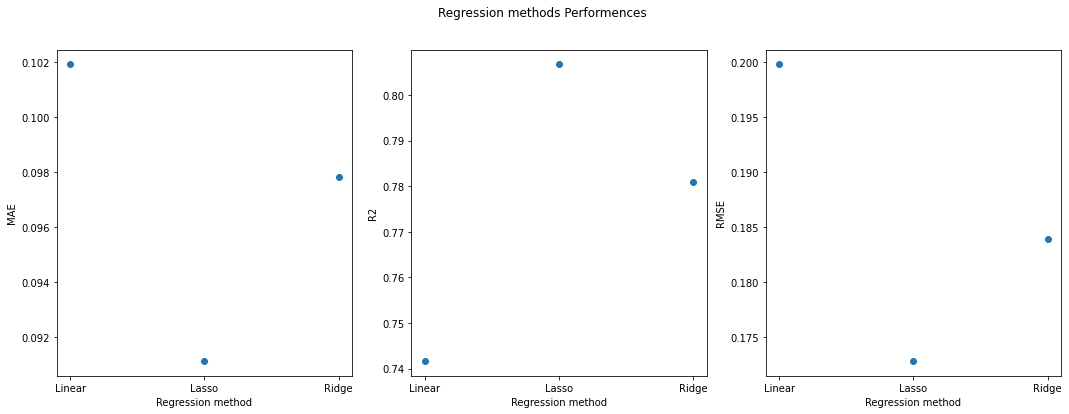

In [ ]:
MAE_array_train = []
MAE_array_valid = []
R2_array_train = []
R2_array_valid = []
RMSE_array_train = []
RMSE_array_valid = []

R = Regression_model(Xtrain, ytrain)
print("Linear Regression Model results:")
R.Linear_reg()
print("performences over Train set:")
Score = R.score_dataset(Xtrain, ytrain)
MAE_array_train.append(Score[0])
R2_array_train.append(Score[1])
RMSE_array_train.append(Score[2])
print("\n")

print("performences over Validation set:")
Score = R.score_dataset(Xvalid, yvalid)
MAE_array_valid.append(Score[0])
R2_array_valid.append(Score[1])
RMSE_array_valid.append(Score[2])
print("\n")

print("Lasso Regression Model results:")
R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
print("performences over Train set:")
Score = R.score_dataset(Xtrain, ytrain)
MAE_array_train.append(Score[0])
R2_array_train.append(Score[1])
RMSE_array_train.append(Score[2])
print("\n")

print("performences over Validation set:")
Score = R.score_dataset(Xvalid, yvalid)
MAE_array_valid.append(Score[0])
R2_array_valid.append(Score[1])
RMSE_array_valid.append(Score[2])
print("\n")

# print("Kernal Ridge Regression Model results:")
# K_reg = R.KernelRidge_reg(10)
# print("performences over Train set:")
# R.score_dataset(Xtrain, ytrain)
# print("\n")
# print("performences over Validation set:")
# R.score_dataset(Xvalid, yvalid)
# print("\n")

R.RidgeKfold_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
print("Ridge Kfold Regression Model results:")
print("performences over Train set:")
Score = R.score_dataset(Xtrain, ytrain)
MAE_array_train.append(Score[0])
R2_array_train.append(Score[1])
RMSE_array_train.append(Score[2])
print("\n")

print("performences over Validation set:")
Score = R.score_dataset(Xvalid, yvalid)
MAE_array_valid.append(Score[0])
R2_array_valid.append(Score[1])
RMSE_array_valid.append(Score[2])
print("\n")

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
axs[0].scatter(["Linear", "Lasso", "Ridge"], MAE_array_valid)
axs[1].scatter(["Linear", "Lasso", "Ridge"], R2_array_valid)
axs[2].scatter(["Linear", "Lasso", "Ridge"], RMSE_array_valid)
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences')
plt.show()

Playing with the KNN imputation - will take onlr Ridge and Lasso regression



### initialization function

In [ ]:
import numpy as np
import pandas as pd
def initialize_data():
    train = pd.read_csv(main_path + '/train.csv')
    test = pd.read_csv(main_path + '/test.csv')
    house_df = pd.concat([train,test],ignore_index = True, sort = False)
    tr_idx = house_df['SalePrice'].notnull()
    te_idx = [not elem for elem in tr_idx]
    te_idx = pd.Series(te_idx)
    # pd.reset_option('all')
    
    # Dropping columns with higher missimg data rate
    missing_data = [col for col in train.columns if (train[col].isnull().sum() / train.shape[0]) * 100 > 50]
    house_df = house_df.drop(missing_data, axis=1)

    # Taking care of skewed target
    house_df['SalePrice'] = np.log1p(house_df['SalePrice'])
    train = house_df[tr_idx]
    test = house_df[tr_idx]
  
    # Taking care of Outliers
    train = Remove_all_ourliers(train)

    house_df = pd.concat([train,test],ignore_index = True, sort = False)
    tr_idx = house_df['SalePrice'].notnull()

    # factorize
    categorical_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if
                    house_df[cname].nunique() < 200 and 
                    house_df[cname].dtype == "object"]

    house_df = Labaling(house_df, categorical_cols)
    X_train = house_df[tr_idx].drop(['SalePrice'], axis=1)
    Y_train = house_df[tr_idx].SalePrice
    te_idx = [not elem for elem in tr_idx]
    te_idx = pd.Series(te_idx)
    X_test = house_df[te_idx]
    Y_test = house_df[te_idx].SalePrice
    
    return X_train, Y_train, X_test, Y_test, categorical_cols, tr_idx, te_idx

K = 2
MAE = 0.09202905597539349
R2 = 0.7996709453042076
RMSE = 0.17593379694423228
MAE = 0.09404245619268074
R2 = 0.7875432570245198
RMSE = 0.18118096331326553
K = 4
MAE = 0.09203521943260713
R2 = 0.7991156205184603
RMSE = 0.1761774779819312
MAE = 0.09394367857693099
R2 = 0.7873660090605743
RMSE = 0.18125652519283864
K = 6
MAE = 0.09197784449300912
R2 = 0.7991329241968522
RMSE = 0.17616989007470435
MAE = 0.09389644534120263
R2 = 0.7875059667105597
RMSE = 0.18119686301706273
K = 8
MAE = 0.09194339972473553
R2 = 0.7992661154371496
RMSE = 0.17611147289249104
MAE = 0.09393680885497283
R2 = 0.7873031974135558
RMSE = 0.18128329461990927
K = 10
MAE = 0.09197296137523692
R2 = 0.7997209415512774
RMSE = 0.17591184162060375
MAE = 0.09392624900781817
R2 = 0.7875240442392845
RMSE = 0.1811891553626066
K = 12
MAE = 0.09199369707567988
R2 = 0.7995323230024163
RMSE = 0.1759946571384056
MAE = 0.0939350540898755
R2 = 0.787218147984902
RMSE = 0.18131953517331506
K = 14
MAE = 0.09202575264933834
R2 = 0.799

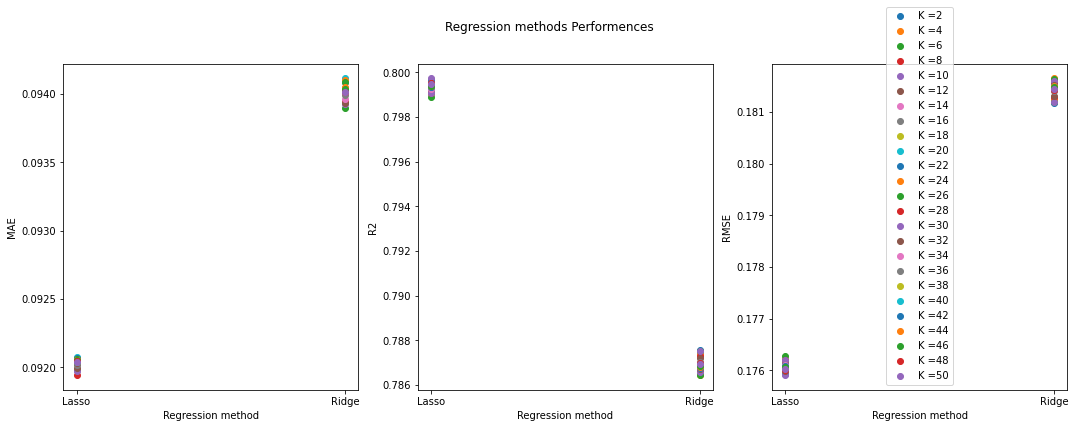

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for K_it in np.linspace(2,50,25, dtype= int):
  X, Y_train, X_test, Y_test = initialize_data(train, test, categorical_cols)
  I = Impute_class(X)
  I.impute_values(cols=categorical_cols, method= "KNN",K=K_it)
  I.impute_values(cols=int_cols, method= "KNN",K=K_it)
  I.impute_values(cols=float_cols, method= "KNN",K=K_it)
  X = I.X
  # normalize features
  X_train_imp_norm =  pd.DataFrame(stats.zscore(X))
  X_train_imp_norm.columns = X.columns
  
  Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp_norm[tr_idx], Y_train, test_size = 0.3, random_state = 0)
  R = Regression_model(Xtrain, ytrain)
  MAE_array_train = []
  MAE_array_valid = []
  R2_array_train = []
  R2_array_valid = []
  RMSE_array_train = []
  RMSE_array_valid = []
  print("K = {}".format(K_it))
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])

  R.RidgeKfold_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])

  axs[0].scatter(["Lasso", "Ridge"], MAE_array_valid, label ="K ={}".format(K_it))
  axs[1].scatter(["Lasso", "Ridge"], R2_array_valid, label ="K ={}".format(K_it))
  axs[2].scatter(["Lasso", "Ridge"], RMSE_array_valid, label ="K ={}".format(K_it))
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences')
plt.legend()
plt.show()

We can notice that Lasso regression performes way better than Ridge Regression

K = 2
MAE = 0.09202905597539349
R2 = 0.7996709453042076
RMSE = 0.17593379694423228
K = 2
MAE = 0.09202905597539349
R2 = 0.7996709453042076
RMSE = 0.17593379694423228
K = 3
MAE = 0.09200235969442769
R2 = 0.7995373839396974
RMSE = 0.17599243557441938
K = 4
MAE = 0.09203521943260713
R2 = 0.7991156205184603
RMSE = 0.1761774779819312
K = 5
MAE = 0.09202512332857554
R2 = 0.7989061175581715
RMSE = 0.17626932206899182
K = 6
MAE = 0.09197784449300912
R2 = 0.7991329241968522
RMSE = 0.17616989007470435
K = 7
MAE = 0.0919680022691085
R2 = 0.7992943002417916
RMSE = 0.17609910865782935
K = 8
MAE = 0.09194339972473553
R2 = 0.7992661154371496
RMSE = 0.17611147289249104
K = 9
MAE = 0.09195716154669221
R2 = 0.799453094795799
RMSE = 0.17602943173109775
K = 10
MAE = 0.09197296137523692
R2 = 0.7997209415512774
RMSE = 0.17591184162060375
K = 11
MAE = 0.0919953482514024
R2 = 0.7993813256398205
RMSE = 0.1760609264920235
K = 12
MAE = 0.09199369707567988
R2 = 0.7995323230024163
RMSE = 0.1759946571384056
K = 13


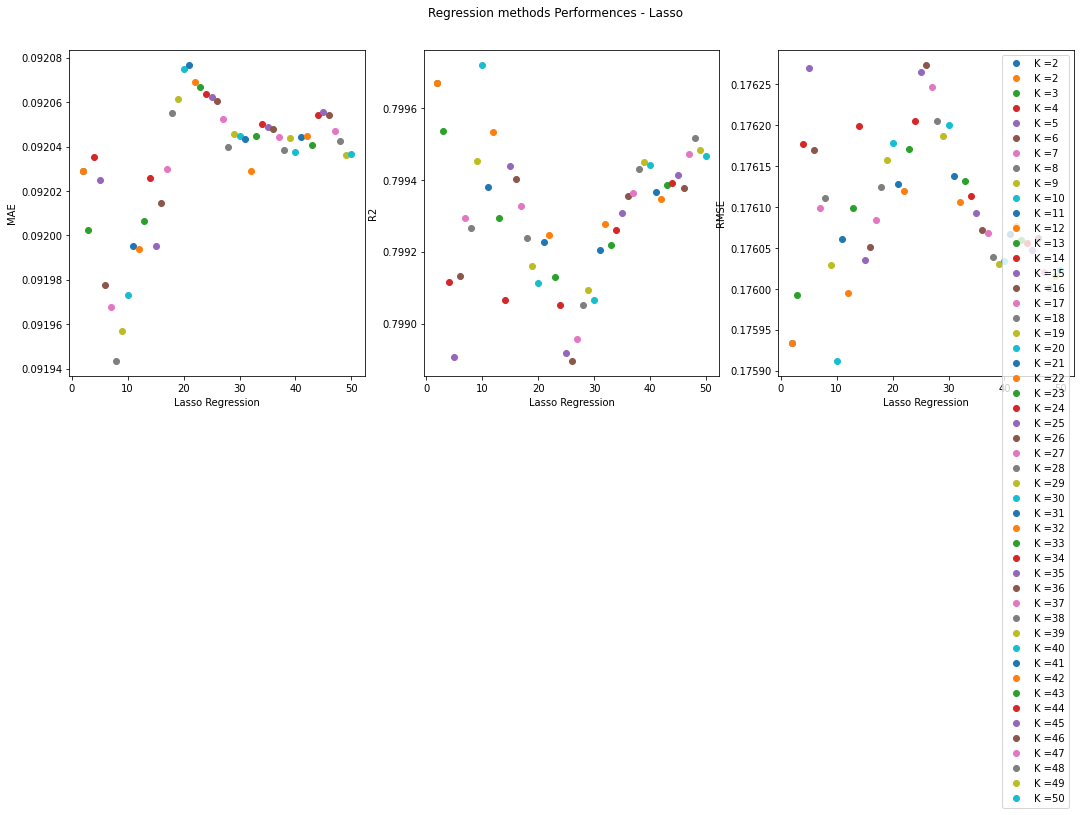

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for K_it in np.linspace(2,50,50, dtype= int):
  X = initialize_data(train, test, categorical_cols)
  I = Impute_class(X)
  I.impute_values(cols=categorical_cols, method= "KNN",K= K_it)
  I.impute_values(cols=int_cols, method= "KNN",K= K_it)
  I.impute_values(cols=float_cols, method= "KNN",K= K_it)
  X = I.X
  X_train_imp_norm =  pd.DataFrame(stats.zscore(X))
  X_train_imp_norm.columns = X.columns
  Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp_norm[tr_idx], Y_train, test_size = 0.3, random_state = 0)
  R = Regression_model(Xtrain, ytrain)
  print("K = {}".format(K_it))
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])

  axs[0].plot(K_it, Score[0],"o", label ="K ={}".format(K_it))
  axs[1].plot(K_it, Score[1],"o", label ="K ={}".format(K_it))
  axs[2].plot(K_it, Score[2],"o", label ="K ={}".format(K_it))
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Lasso Regression")
axs[1].set_xlabel("Lasso Regression")
axs[2].set_xlabel("Lasso Regression")
fig.suptitle('Regression methods Performences - Lasso')
plt.legend()
plt.show()

MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937


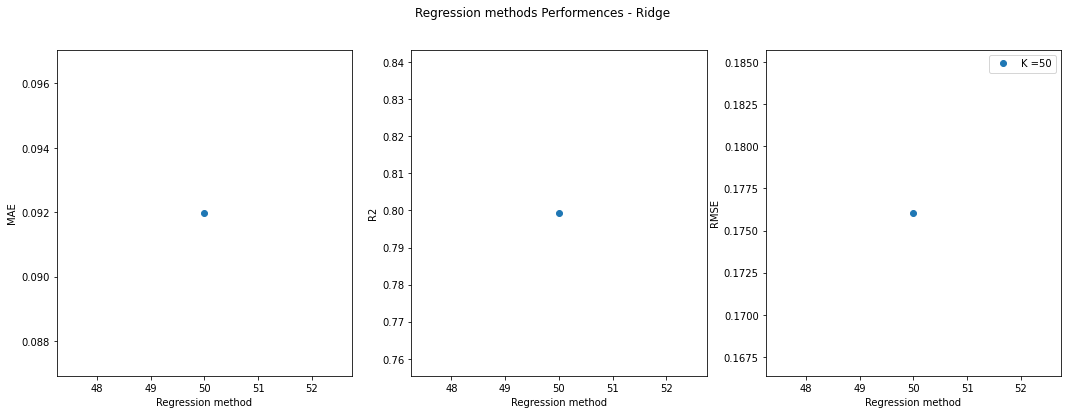

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
X = initialize_data(train, test, categorical_cols)
I = Impute_class(X)
I.impute_values(cols=categorical_cols, method= "most_frequent")
I.impute_values(cols=int_cols, method= "mean")
I.impute_values(cols=float_cols, method= "median",)
X = I.X
X_train_imp_norm =  pd.DataFrame(stats.zscore(X))
X_train_imp_norm.columns = X.columns
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp_norm[tr_idx], Y_train, test_size = 0.3, random_state = 0)
R = Regression_model(Xtrain, ytrain)
R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
Score = R.score_dataset(Xvalid, yvalid)
MAE_array_valid.append(Score[0])
R2_array_valid.append(Score[1])
RMSE_array_valid.append(Score[2])
axs[0].plot(K_it, Score[0],"o", label ="K ={}".format(K_it))
axs[1].plot(K_it, Score[1],"o", label ="K ={}".format(K_it))
axs[2].plot(K_it, Score[2],"o", label ="K ={}".format(K_it))
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences - Ridge')
# plt.legend()
plt.show()

K = 10
MAE = 0.09197296137523692
R2 = 0.7997209415512774
RMSE = 0.17591184162060375

K = 8
MAE = 0.09194339972473553
R2 = 0.7992661154371496
RMSE = 0.17611147289249104

No KNN:
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937

best resukts given by using K = 10

*Only Categorical Variabels using KNN:*



K = 2
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 4
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 6
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 8
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 10
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 12
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 14
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 16
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 18
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 20
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 22
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 24
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589

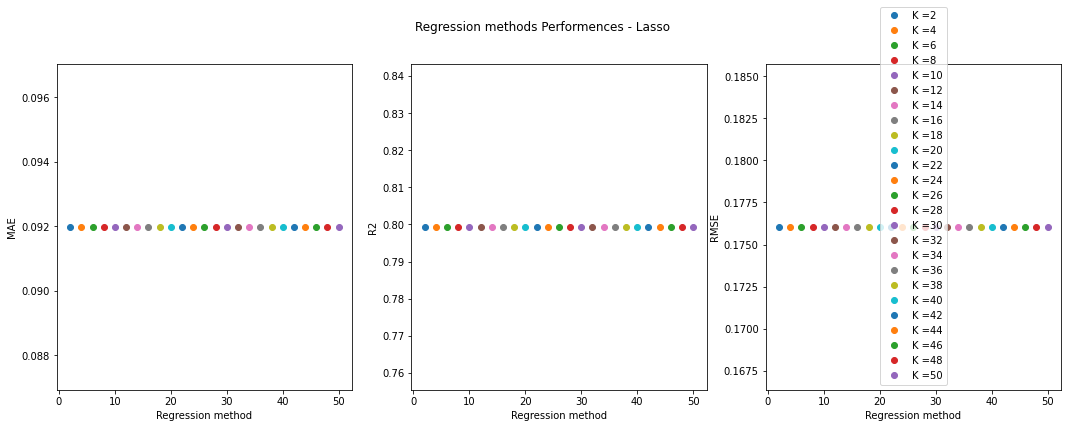

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for K_it in np.linspace(2,50,25, dtype= int):
  X = initialize_data(train, test, categorical_cols)
  I = Impute_class(X)
  I.impute_values(cols=categorical_cols, method= "KNN",K= K_it)
  I.impute_values(cols=int_cols, method= "mean")
  I.impute_values(cols=float_cols, method= "median")
  X = I.X
  X_train_imp_norm =  pd.DataFrame(stats.zscore(X))
  X_train_imp_norm.columns = X.columns
  Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp_norm[tr_idx], Y_train, test_size = 0.3, random_state = 0)
  print("K = {}".format(K_it))
  R = Regression_model(Xtrain, ytrain)
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])
  axs[0].plot(K_it, Score[0],"o", label ="K ={}".format(K_it))
  axs[1].plot(K_it, Score[1],"o", label ="K ={}".format(K_it))
  axs[2].plot(K_it, Score[2],"o", label ="K ={}".format(K_it))
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences - Lasso')
plt.legend()
plt.show()

*Only int Variabels using KNN:*

K = 2
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 4
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 6
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 8
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 10
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 12
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 14
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 16
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 18
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 20
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 22
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937
K = 24
MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589

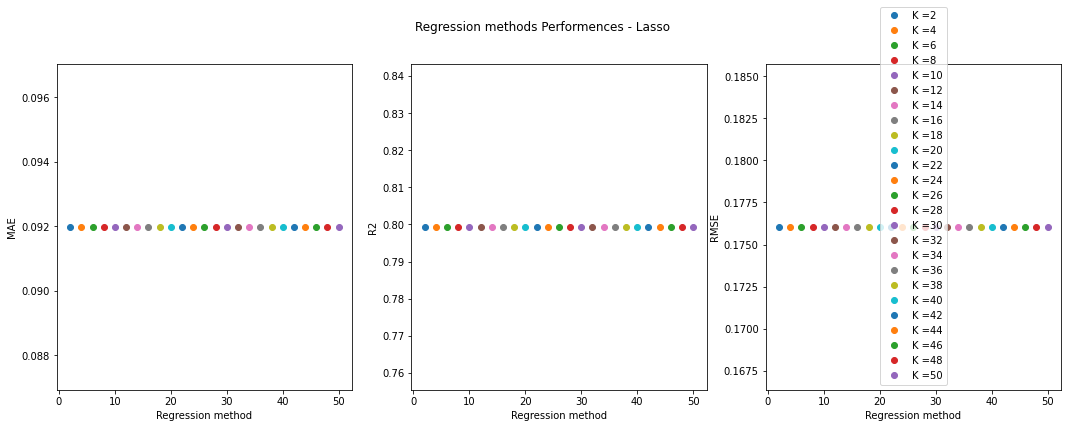

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for K_it in np.linspace(2,50,25, dtype= int):
  X = initialize_data(train, test, categorical_cols)
  I = Impute_class(X)
  I.impute_values(cols=categorical_cols, method= "most_frequent")
  I.impute_values(cols=int_cols, method= "KNN",K= K_it)
  I.impute_values(cols=float_cols, method= "median")
  X = I.X
  X_train_imp_norm =  pd.DataFrame(stats.zscore(X))
  X_train_imp_norm.columns = X.columns
  Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp_norm[tr_idx], Y_train, test_size = 0.3, random_state = 0)
  print("K = {}".format(K_it))
  R = Regression_model(Xtrain, ytrain)
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])
  axs[0].plot(K_it, Score[0],"o", label ="K ={}".format(K_it))
  axs[1].plot(K_it, Score[1],"o", label ="K ={}".format(K_it))
  axs[2].plot(K_it, Score[2],"o", label ="K ={}".format(K_it))
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences - Lasso')
plt.legend()
plt.show()

*Only float Variabels using KNN:*

K = 2
MAE = 0.09202905597539349
R2 = 0.7996709453042076
RMSE = 0.17593379694423228
K = 4
MAE = 0.09203521943260713
R2 = 0.7991156205184603
RMSE = 0.1761774779819312
K = 6
MAE = 0.09197784449300912
R2 = 0.7991329241968522
RMSE = 0.17616989007470435
K = 8
MAE = 0.09194339972473553
R2 = 0.7992661154371496
RMSE = 0.17611147289249104
K = 10
MAE = 0.09197296137523692
R2 = 0.7997209415512774
RMSE = 0.17591184162060375
K = 12
MAE = 0.09199369707567988
R2 = 0.7995323230024163
RMSE = 0.1759946571384056
K = 14
MAE = 0.09202575264933834
R2 = 0.7990663511064717
RMSE = 0.17619908152473507
K = 16
MAE = 0.0920144802457741
R2 = 0.7994038801803032
RMSE = 0.17605102939515047
K = 18
MAE = 0.09205530586097103
R2 = 0.7992379615228599
RMSE = 0.17612382270946964
K = 20
MAE = 0.09207508224109995
R2 = 0.7991127717574072
RMSE = 0.1761787271725345
K = 22
MAE = 0.09206900632277903
R2 = 0.7992473794173427
RMSE = 0.17611969161216628
K = 24
MAE = 0.09206357900304009
R2 = 0.7990517548920011
RMSE = 0.1762054811320021
K

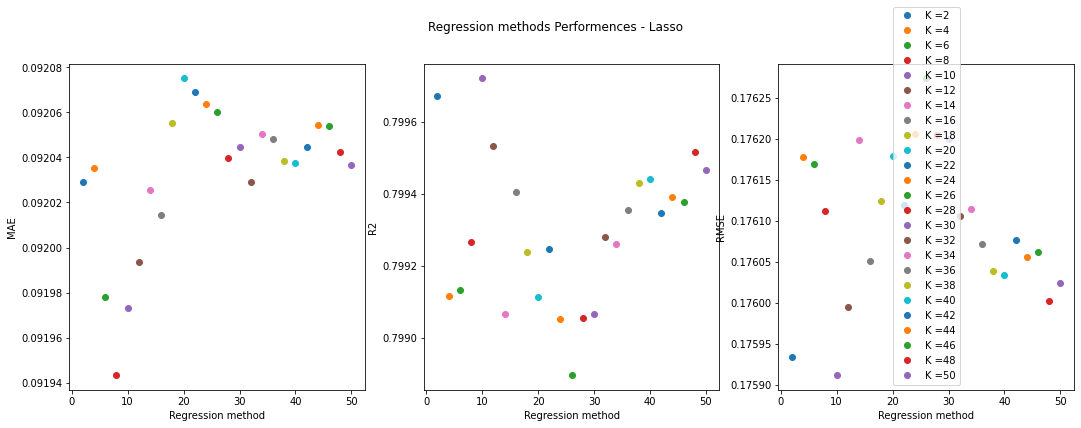

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for K_it in np.linspace(2,50,25, dtype= int):
  X = initialize_data(train, test, categorical_cols)
  I = Impute_class(X)
  I.impute_values(cols=categorical_cols, method= "most_frequent")
  I.impute_values(cols=int_cols, method= "mean")
  I.impute_values(cols=float_cols, method= "KNN",K= K_it)
  X = I.X
  X_train_imp_norm =  pd.DataFrame(stats.zscore(X))
  X_train_imp_norm.columns = X.columns
  Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp_norm[tr_idx], Y_train, test_size = 0.3, random_state = 0)
  print("K = {}".format(K_it))
  R = Regression_model(Xtrain, ytrain)
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])
  axs[0].plot(K_it, Score[0],"o", label ="K ={}".format(K_it))
  axs[1].plot(K_it, Score[1],"o", label ="K ={}".format(K_it))
  axs[2].plot(K_it, Score[2],"o", label ="K ={}".format(K_it))
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences - Lasso')
plt.legend()
plt.show()

K = 2
MAE = 0.09202905597539349
R2 = 0.7996709453042076
RMSE = 0.17593379694423228
K = 4
MAE = 0.09203521943260713
R2 = 0.7991156205184603
RMSE = 0.1761774779819312
K = 6
MAE = 0.09197784449300912
R2 = 0.7991329241968522
RMSE = 0.17616989007470435
K = 8
MAE = 0.09194339972473553
R2 = 0.7992661154371496
RMSE = 0.17611147289249104
K = 10
MAE = 0.09197296137523692
R2 = 0.7997209415512774
RMSE = 0.17591184162060375
K = 12
MAE = 0.09199369707567988
R2 = 0.7995323230024163
RMSE = 0.1759946571384056
K = 14
MAE = 0.09202575264933834
R2 = 0.7990663511064717
RMSE = 0.17619908152473507
K = 16
MAE = 0.0920144802457741
R2 = 0.7994038801803032
RMSE = 0.17605102939515047
K = 18
MAE = 0.09205530586097103
R2 = 0.7992379615228599
RMSE = 0.17612382270946964
K = 20
MAE = 0.09207508224109995
R2 = 0.7991127717574072
RMSE = 0.1761787271725345
K = 22
MAE = 0.09206900632277903
R2 = 0.7992473794173427
RMSE = 0.17611969161216628
K = 24
MAE = 0.09206357900304009
R2 = 0.7990517548920011
RMSE = 0.1762054811320021
K

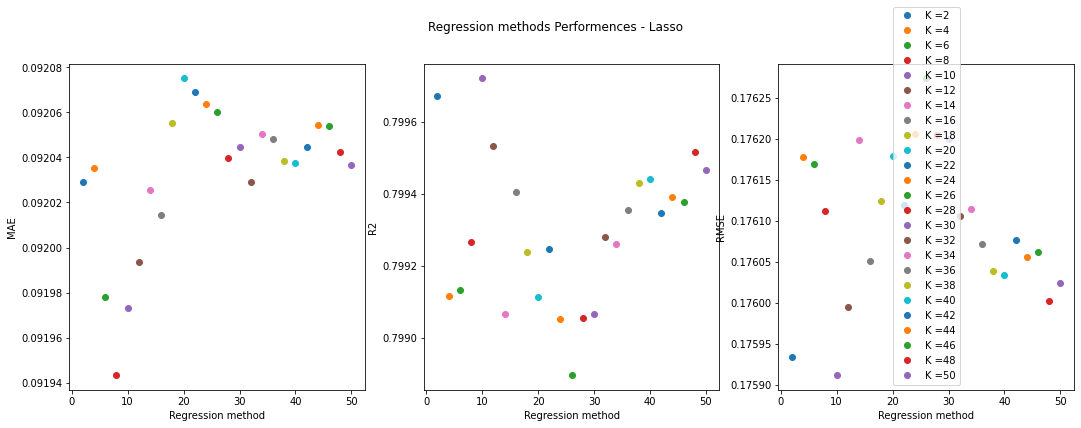

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for K_it in np.linspace(2,50,25, dtype= int):
  X = initialize_data(train, test, categorical_cols)
  I = Impute_class(X)
  I.impute_values(cols=categorical_cols, method= "KNN",K= K_it)
  I.impute_values(cols=int_cols, method= "KNN",K= K_it)
  I.impute_values(cols=float_cols, method= "KNN",K= K_it)
  X = I.X
  X_train_imp_norm =  pd.DataFrame(stats.zscore(X))
  X_train_imp_norm.columns = X.columns
  Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp_norm[tr_idx], Y_train, test_size = 0.3, random_state = 0)
  print("K = {}".format(K_it))
  R = Regression_model(Xtrain, ytrain)
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])
  axs[0].plot(K_it, Score[0],"o", label ="K ={}".format(K_it))
  axs[1].plot(K_it, Score[1],"o", label ="K ={}".format(K_it))
  axs[2].plot(K_it, Score[2],"o", label ="K ={}".format(K_it))
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences - Lasso')
plt.legend()
plt.show()

**Categorical Value:**

MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937


**Int Values:**

MAE = 0.09198478447624521
R2 = 0.7993810645978225
RMSE = 0.17606104103589937

**float Values:**

K = 8
MAE = 0.09194339972473553
R2 = 0.7992661154371496
RMSE = 0.17611147289249104

K = 10
MAE = 0.09197296137523692
R2 = 0.7997209415512774
RMSE = 0.17591184162060375

**all KNN:**

K = 8
MAE = 0.09194339972473553
R2 = 0.7992661154371496
RMSE = 0.17611147289249104

K = 10
MAE = 0.09197296137523692
R2 = 0.7997209415512774
RMSE = 0.17591184162060375



**We can notice that applying KNN imputing is beneficail only when applied on float represented Variabels, and performs better then not using KNN at all *

In [ ]:
house_df.iloc[705]

Id                   706
MSSubClass           190
MSZoning              RM
LotFrontage           70
LotArea             5600
Street              Pave
Alley                NaN
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood      IDOTRR
Condition1          Norm
Condition2          Norm
BldgType          2fmCon
HouseStyle        2Story
OverallQual            4
OverallCond            5
YearBuilt           1930
YearRemodAdd        1950
RoofStyle            Hip
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      Wd Shng
MasVnrType          None
MasVnrArea             0
ExterQual             Fa
ExterCond             Fa
Foundation          Slab
BsmtQual             NaN
BsmtCond             NaN
BsmtExposure         NaN
BsmtFinType1         NaN
BsmtFinSF1             0
BsmtFinType2         NaN
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating             GasA


### 3.2.1 Label Encoding vs Factorization 


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

K = 2
MAE = 0.09119039981738267
R2 = 0.8063326737781068
RMSE = 0.17298381988098666

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

K = 4
MAE = 0.0911172706739835
R2 = 0.8059395219575465
RMSE = 0.17315931263157777

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

K = 6
MAE = 0.09111166582251888
R2 = 0.8059279304860831
RMSE = 0.17316448406390503

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

K = 8
MAE = 0.09109880914722275
R2 = 0.8061179460619396
RMSE = 0.1730796908032552

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

K = 10
MAE = 0.09113030833080774
R2 = 0.

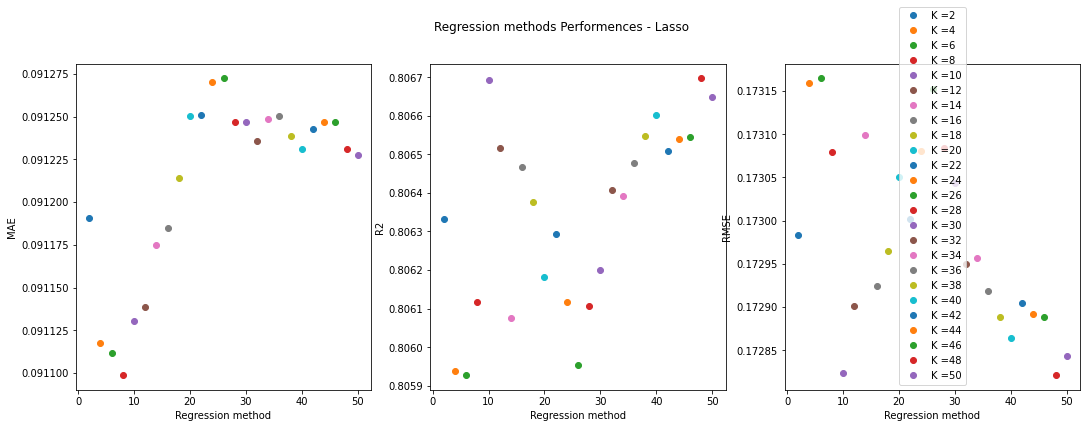

In [ ]:
# Using Label Encoding in order to mess with Categorical Values
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
MAE_array_train = []
MAE_array_valid = []
R2_array_train = []
R2_array_valid = []
RMSE_array_train = []
RMSE_array_valid = []
for K_it in np.linspace(2,50,25, dtype= int):
  X, Y_train, X_test, Y_test = initialize_data(train, test, categorical_cols)
  I = Impute_class(X)
  I.impute_values(cols=categorical_cols, method= "most_frequent")
  I.impute_values(cols= int_cols, method= "median")
  I.impute_values(cols= float_cols, method= "KNN", K=K_it)
  X = I.X
  X_train_imp_norm =  pd.DataFrame(stats.zscore(X))
  X_train_imp_norm.columns = X.columns
  Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp_norm[tr_idx], Y_train, test_size = 0.3, random_state = 0)
  print("K = {}".format(K_it))
  R = Regression_model(Xtrain, ytrain)
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])
  axs[0].plot(K_it, Score[0],"o", label ="K ={}".format(K_it))
  axs[1].plot(K_it, Score[1],"o", label ="K ={}".format(K_it))
  axs[2].plot(K_it, Score[2],"o", label ="K ={}".format(K_it))

  # Score = R.score_dataset(X_test, Y_test)
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences - Lasso')
plt.legend()
plt.show()

Similarly, Best performences given by setting K =10. 

The main difference between Factorize and label encoding is that label encoding sets the Major class in each categorical value to be the highest numerical value and the minor to be 0, in contrast to factorization which does the opposite!

Factorize Encoding Results:

MAE = 0.09197296137523692
R2 = 0.7997209415512774
RMSE = 0.17591184162060375

Label Encoding Results:

MAE = 0.09113030833080774
R2 = 0.8066921745407033
RMSE = 0.17282319211095384


### Adding Outliers removal

In [ ]:
# Using Label Encoding in order to mess with Categorical Values
X_train, Y_train, X_test, Y_test, categorical_cols, tr_idx, te_idx = initialize_data()
# print(X)
I = Impute_class(X_train)
I.impute_values(cols=categorical_cols, method= "most_frequent")
I.impute_values(cols= int_cols, method= "median")
I.impute_values(cols= float_cols, method= "KNN", K=10)
X_train = I.X
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 0)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", Xvalid.shape)
print("Y_test", yvalid.shape)
R = Regression_model(Xtrain, ytrain)
R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
Score = R.score_dataset(Xvalid, yvalid)

X_train (2903, 76)
Y_train (2903,)
X_test (871, 76)
Y_test (871,)
MAE = 0.08844451795717097
R2 = 0.9056664920205629
RMSE = 0.12468541165124385


In [ ]:
ytrain = pd.Series(ytrain)
ytrain.isna()

30

In [ ]:
# Using Label Encoding in order to mess with Categorical Values
X_train, Y_train, X_test, Y_test, categorical_cols, tr_idx, te_idx = initialize_data()
# print(X)
I = Impute_class(X_train)
I.impute_values(cols=categorical_cols, method= "most_frequent")
I.impute_values(cols= int_cols, method= "median")
I.impute_values(cols= float_cols, method= "KNN", K=10)
X_train = I.X
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 0)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", Xvalid.shape)
print("Y_test", yvalid.shape)
R = Regression_model(Xtrain, ytrain)
R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
Score = R.score_dataset(Xvalid, yvalid)

X_train (2903, 76)
Y_train (2903,)
X_test (871, 76)
Y_test (871,)
MAE = 0.08844451795717097
R2 = 0.9056664920205629
RMSE = 0.12468541165124385


K = 2
MAE = 0.08866021995863446
R2 = 0.9072240841915343
RMSE = 0.12365175253274097
K = 4
MAE = 0.08874380358603727
R2 = 0.9073959587847078
RMSE = 0.12353716219630897
K = 6
MAE = 0.08878919982573596
R2 = 0.9073537723726158
RMSE = 0.12356529809705326
K = 8
MAE = 0.08876907069288038
R2 = 0.9072804252741588
RMSE = 0.12361420112972119
K = 10
MAE = 0.0887868805439725
R2 = 0.9072897247399168
RMSE = 0.12360800192712904
K = 12
MAE = 0.08878802888629693
R2 = 0.9072869825896273
RMSE = 0.12360982992953229
K = 14
MAE = 0.08878141598878174
R2 = 0.9072733474539734
RMSE = 0.1236189191323343
K = 16
MAE = 0.08878117682142761
R2 = 0.9072740798474771
RMSE = 0.12361843093466085
K = 18
MAE = 0.08878041555739727
R2 = 0.9072276373464271
RMSE = 0.12364938468742041
K = 20
MAE = 0.08878601192276325
R2 = 0.9072214919436421
RMSE = 0.12365347999483653
K = 22
MAE = 0.08878480345170892
R2 = 0.9072586112563826
RMSE = 0.12362874155338897
K = 24
MAE = 0.08877654878847674
R2 = 0.9072638219377801
RMSE = 0.1236252684598692

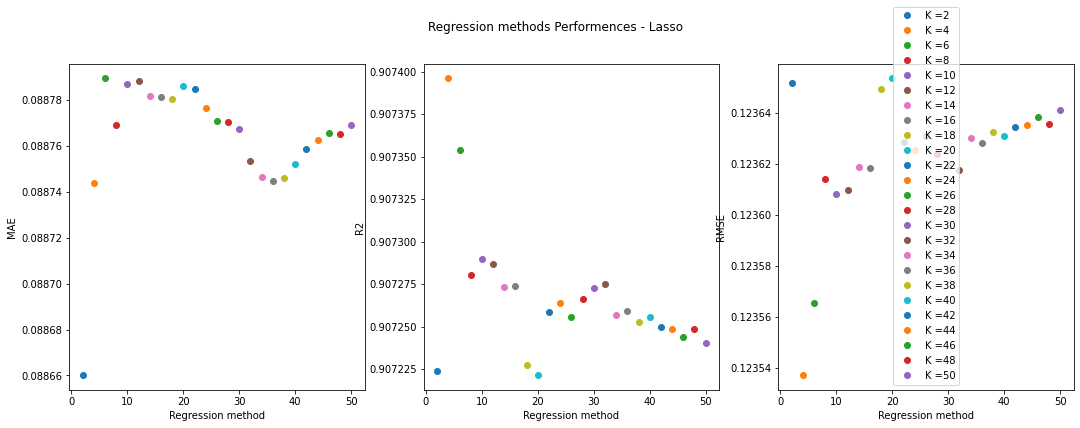

In [ ]:
# Using Label Encoding in order to mess with Categorical Values
fig, axs = plt.subplots(1, 3, figsize=(36, 12), sharey=False)
MAE_array_train = []
MAE_array_valid = []
R2_array_train = []
R2_array_valid = []
RMSE_array_train = []
RMSE_array_valid = []
for K_it in np.linspace(2,50,25, dtype= int):

  X_train, Y_train, X_test, Y_test, categorical_cols, tr_idx, te_idx = initialize_data()
  # print(X)
  I = Impute_class(X_train)
  I.impute_values(cols=categorical_cols, method= "most_frequent")
  I.impute_values(cols= int_cols, method= "median")
  I.impute_values(cols= float_cols, method= "KNN", K=K_it)
  X_train = I.X
  X_train =  pd.DataFrame(stats.zscore(X_train))
  X_train.columns = X_train.columns
  Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 0)
  print("K = {}".format(K_it))
  R = Regression_model(Xtrain, ytrain)
  R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
  Score = R.score_dataset(Xvalid, yvalid)
  MAE_array_valid.append(Score[0])
  R2_array_valid.append(Score[1])
  RMSE_array_valid.append(Score[2])
  axs[0].plot(K_it, Score[0],"o", label ="K ={}".format(K_it))
  axs[1].plot(K_it, Score[1],"o", label ="K ={}".format(K_it))
  axs[2].plot(K_it, Score[2],"o", label ="K ={}".format(K_it))

  # Score = R.score_dataset(X_test, Y_test)
axs[0].set_ylabel("MAE")
axs[1].set_ylabel("R2")
axs[2].set_ylabel("RMSE")
axs[0].set_xlabel("Regression method")
axs[1].set_xlabel("Regression method")
axs[2].set_xlabel("Regression method")
fig.suptitle('Regression methods Performences - Lasso')
plt.legend()
plt.show()

After Outliers removal, best result given cy choosing K = 4

K = 4

MAE = 0.08874380358603727
R2 = 0.9073959587847078
RMSE = 0.12353716219630897

In [ ]:
from scipy import stats
# Using Label Encoding in order to mess with Categorical Values
X_train, Y_train, X_test, Y_test, categorical_cols, tr_idx, te_idx = initialize_data()
# print(X)
I = Impute_class(X_train)
I.impute_values(cols=categorical_cols, method= "most_frequent")
I.impute_values(cols= int_cols, method= "median")
I.impute_values(cols= float_cols, method= "KNN", K=4)
X_train = I.X
X_train = pd.DataFrame(stats.zscore(X_train))
X_train.columns = X_train.columns
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 0)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", Xvalid.shape)
print("Y_test", yvalid.shape)
R = Regression_model(Xtrain, ytrain)
R.Lasso_reg([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
Score = R.score_dataset(Xvalid, yvalid)
Score = R.score_dataset(Xvalid, yvalid)

X_train (2903, 76)
Y_train (2903,)
X_test (871, 76)
Y_test (871,)
MAE = 0.08874380358603727
R2 = 0.9073959587847078
RMSE = 0.12353716219630897
